In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
Train = pd.read_csv("adult.csv")
test = pd.read_csv('adult_test.csv')

# combine train and test

In [3]:
data = Train.append(test)
data.reset_index(inplace = True, drop = True)
data

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48838,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,NaN
48838,48839,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,NaN
48839,48840,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,NaN
48840,48841,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,NaN


# data cleaning

### Age

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

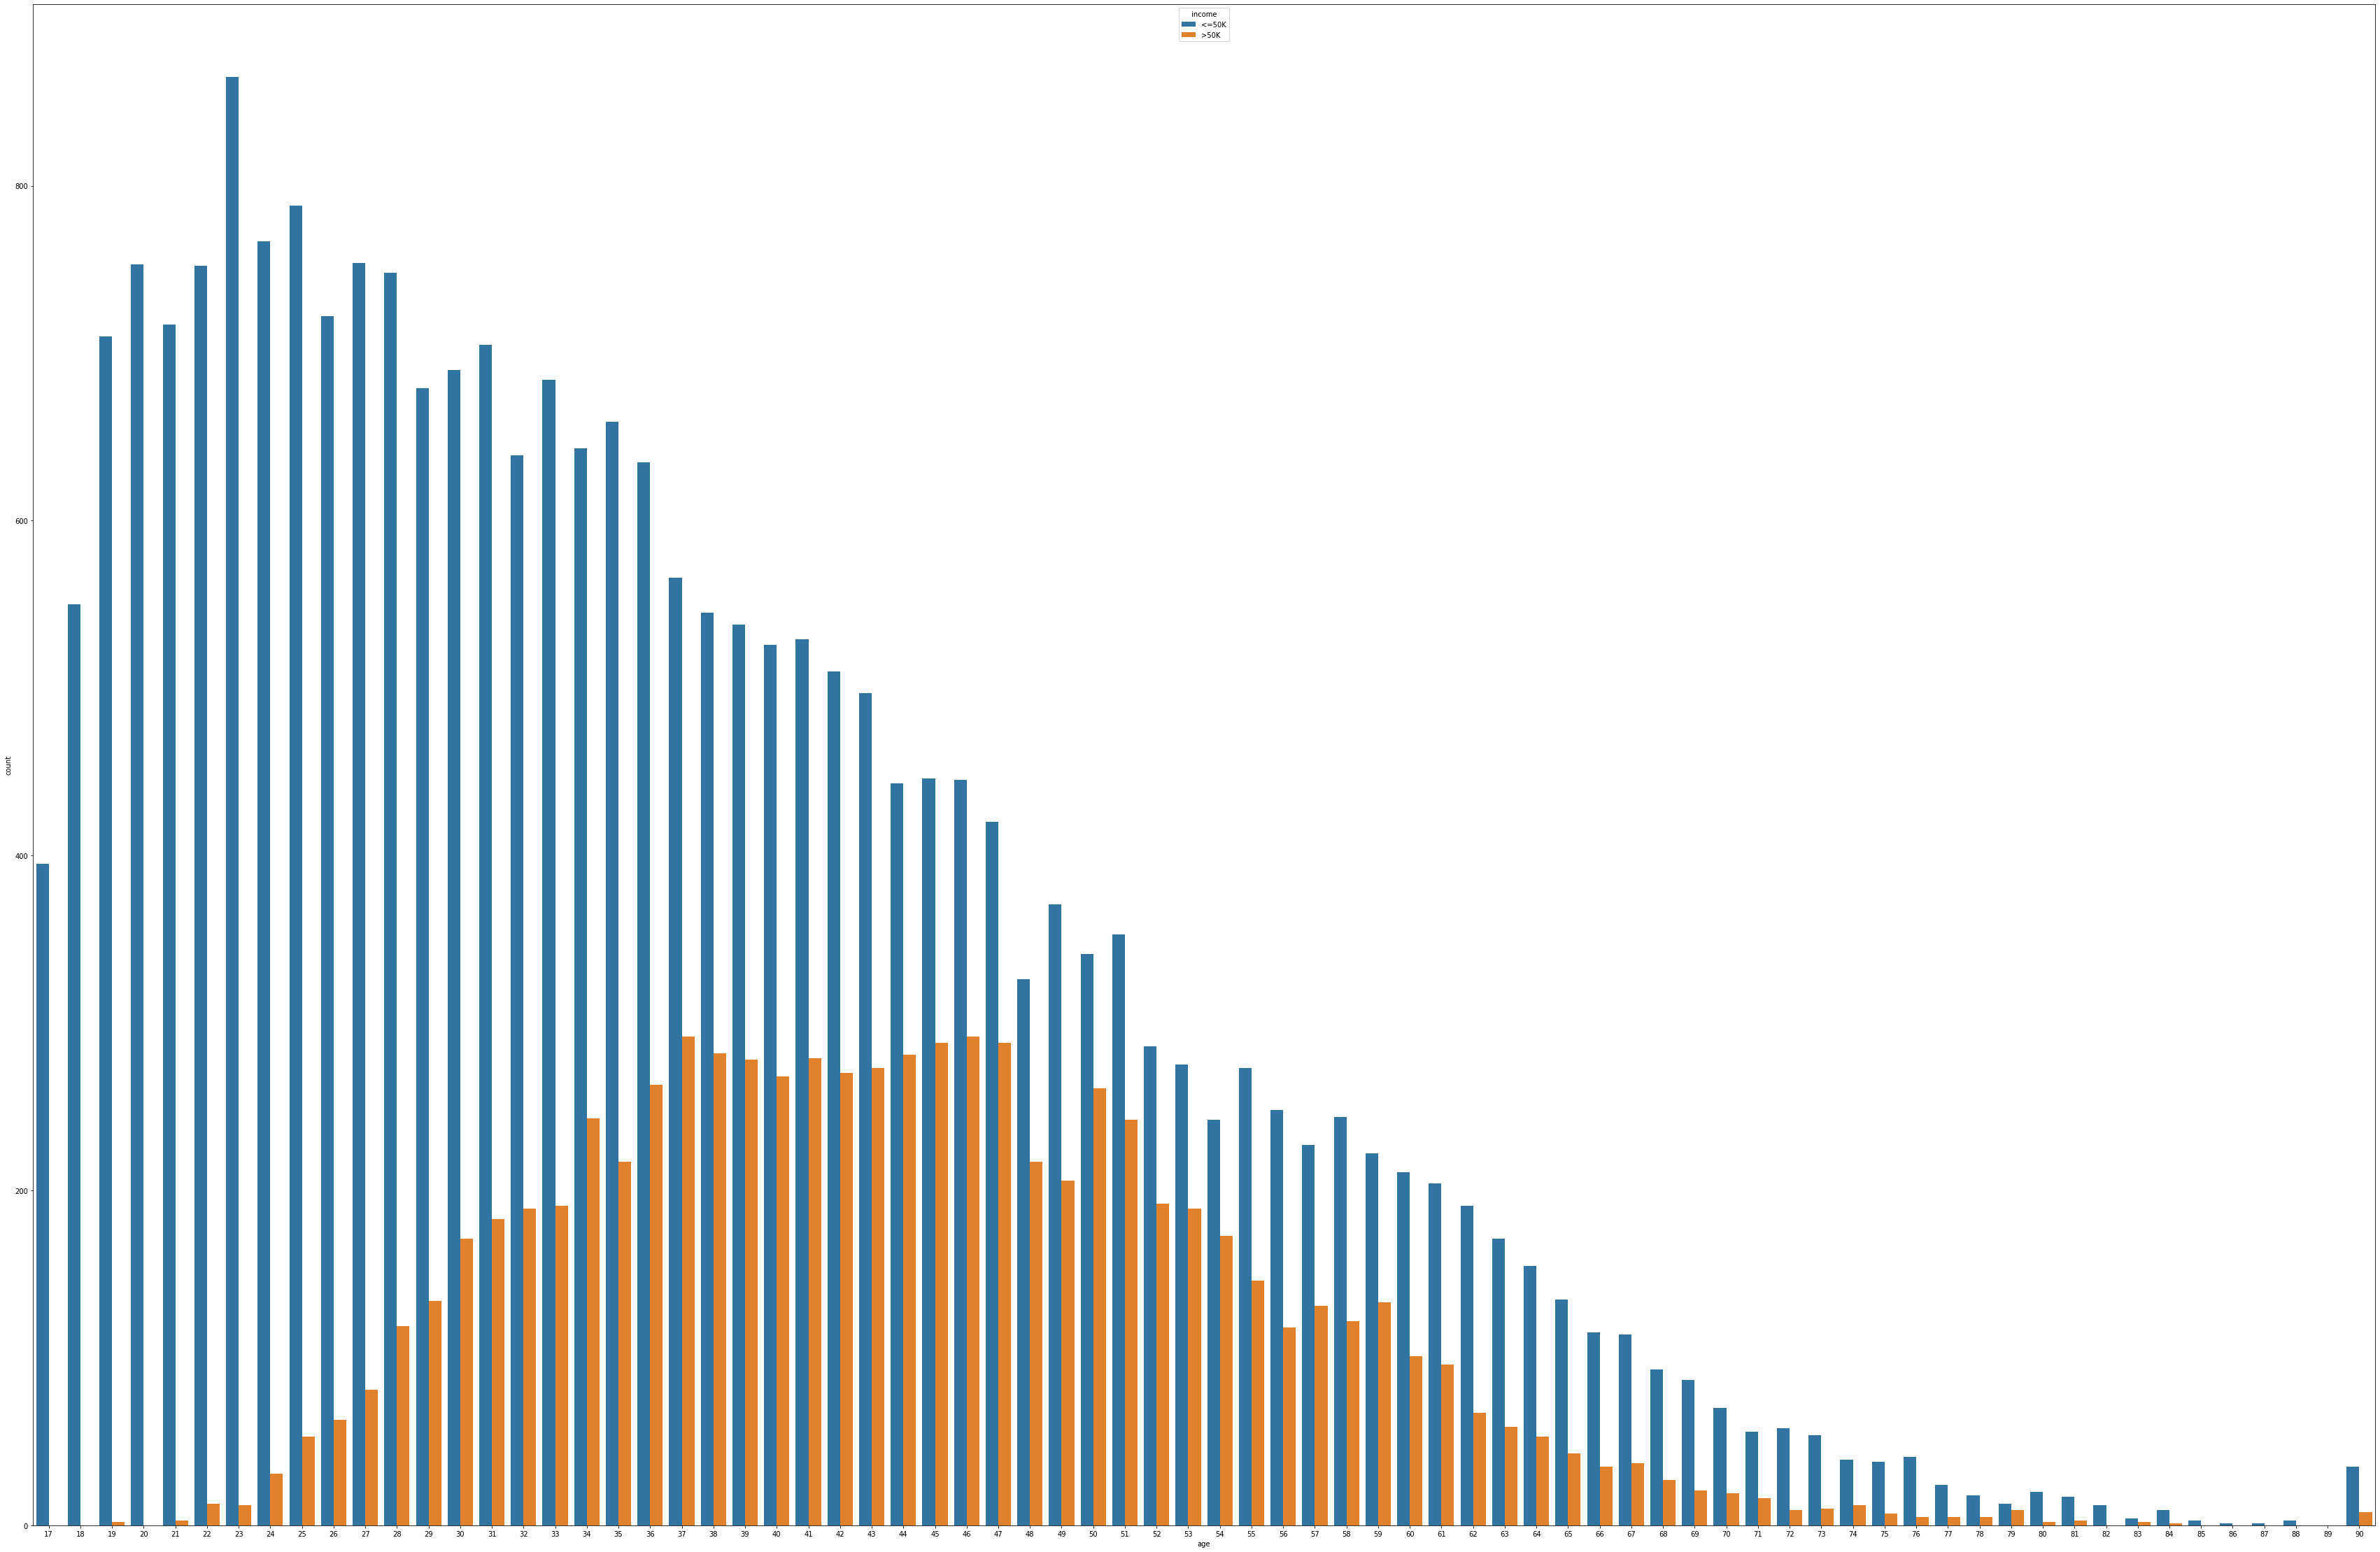

In [4]:
plt.figure(figsize=(60,40))
sns.countplot(data['age'], hue = data['income'])

In [5]:
#data['age'] = np.log(data['age'])

In [6]:
data['age']

0        39
1        50
2        38
3        53
4        28
         ..
48837    39
48838    64
48839    38
48840    44
48841    35
Name: age, Length: 48842, dtype: int64

In [7]:
data['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89])

### workclass

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

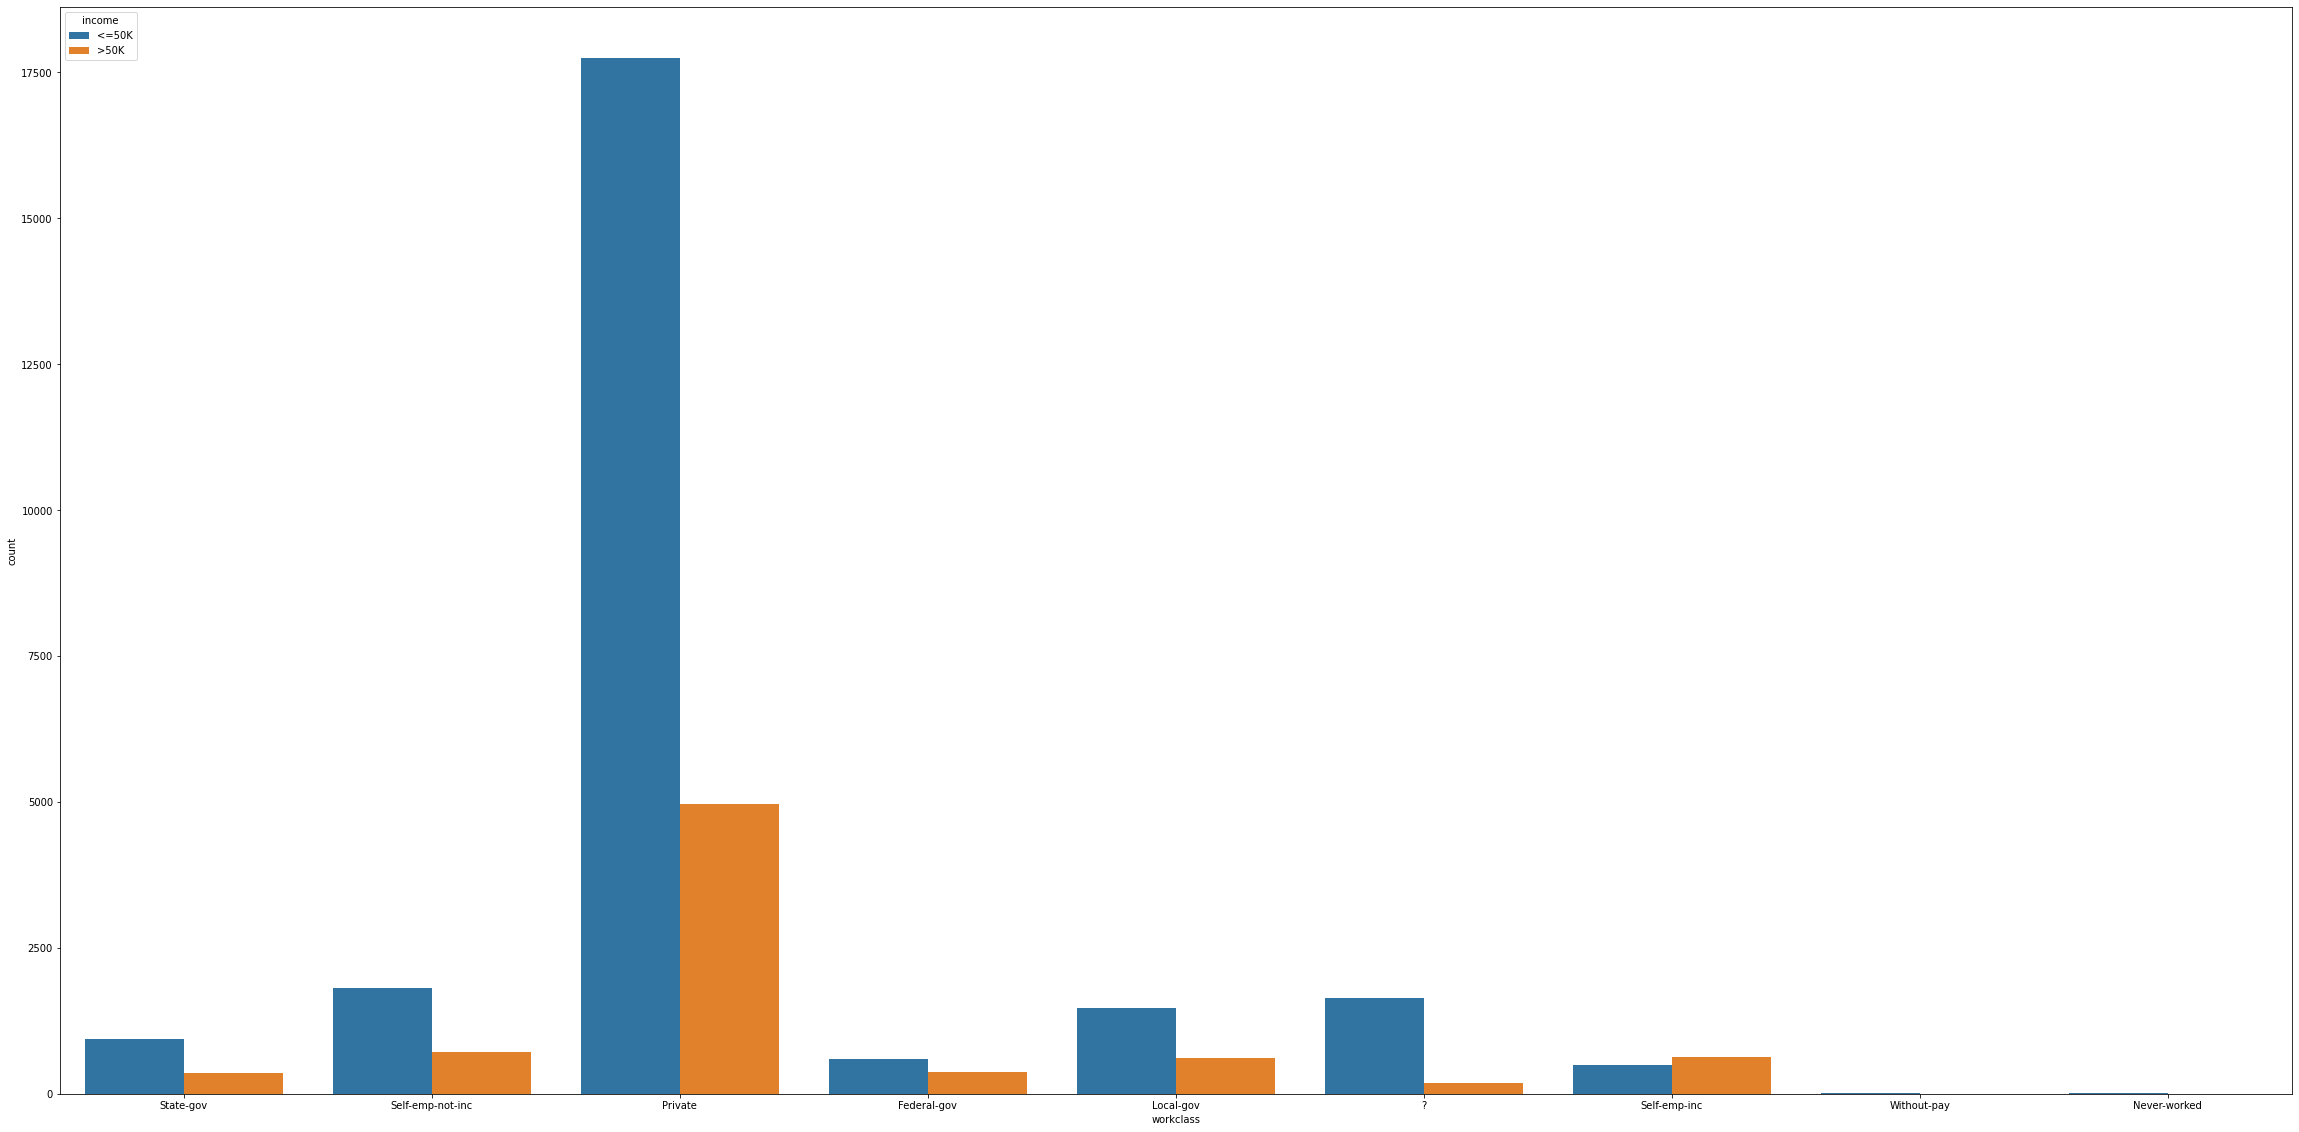

In [8]:
plt.figure(figsize=(40,20))
sns.countplot(data['workclass'], hue = data['income'])


In [9]:
 data['workclass'].replace(['Without-pay', 'Never-worked'],
                          ['Non-pay','Non-pay'], inplace = True)


In [10]:
non_id = data[(data['workclass'] == 'Non-pay') & (data['income'].isnull())]['id']

In [11]:
non_id = non_id.to_frame()

### fnlwgt

In [12]:

data['fnlwgt'] = np.log(data['fnlwgt'])

In [13]:
data['fnlwgt'].describe()

count    48842.000000
mean        11.982950
std          0.630823
min          9.416134
25%         11.674623
50%         12.090350
75%         12.378521
max         14.214555
Name: fnlwgt, dtype: float64

### education

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

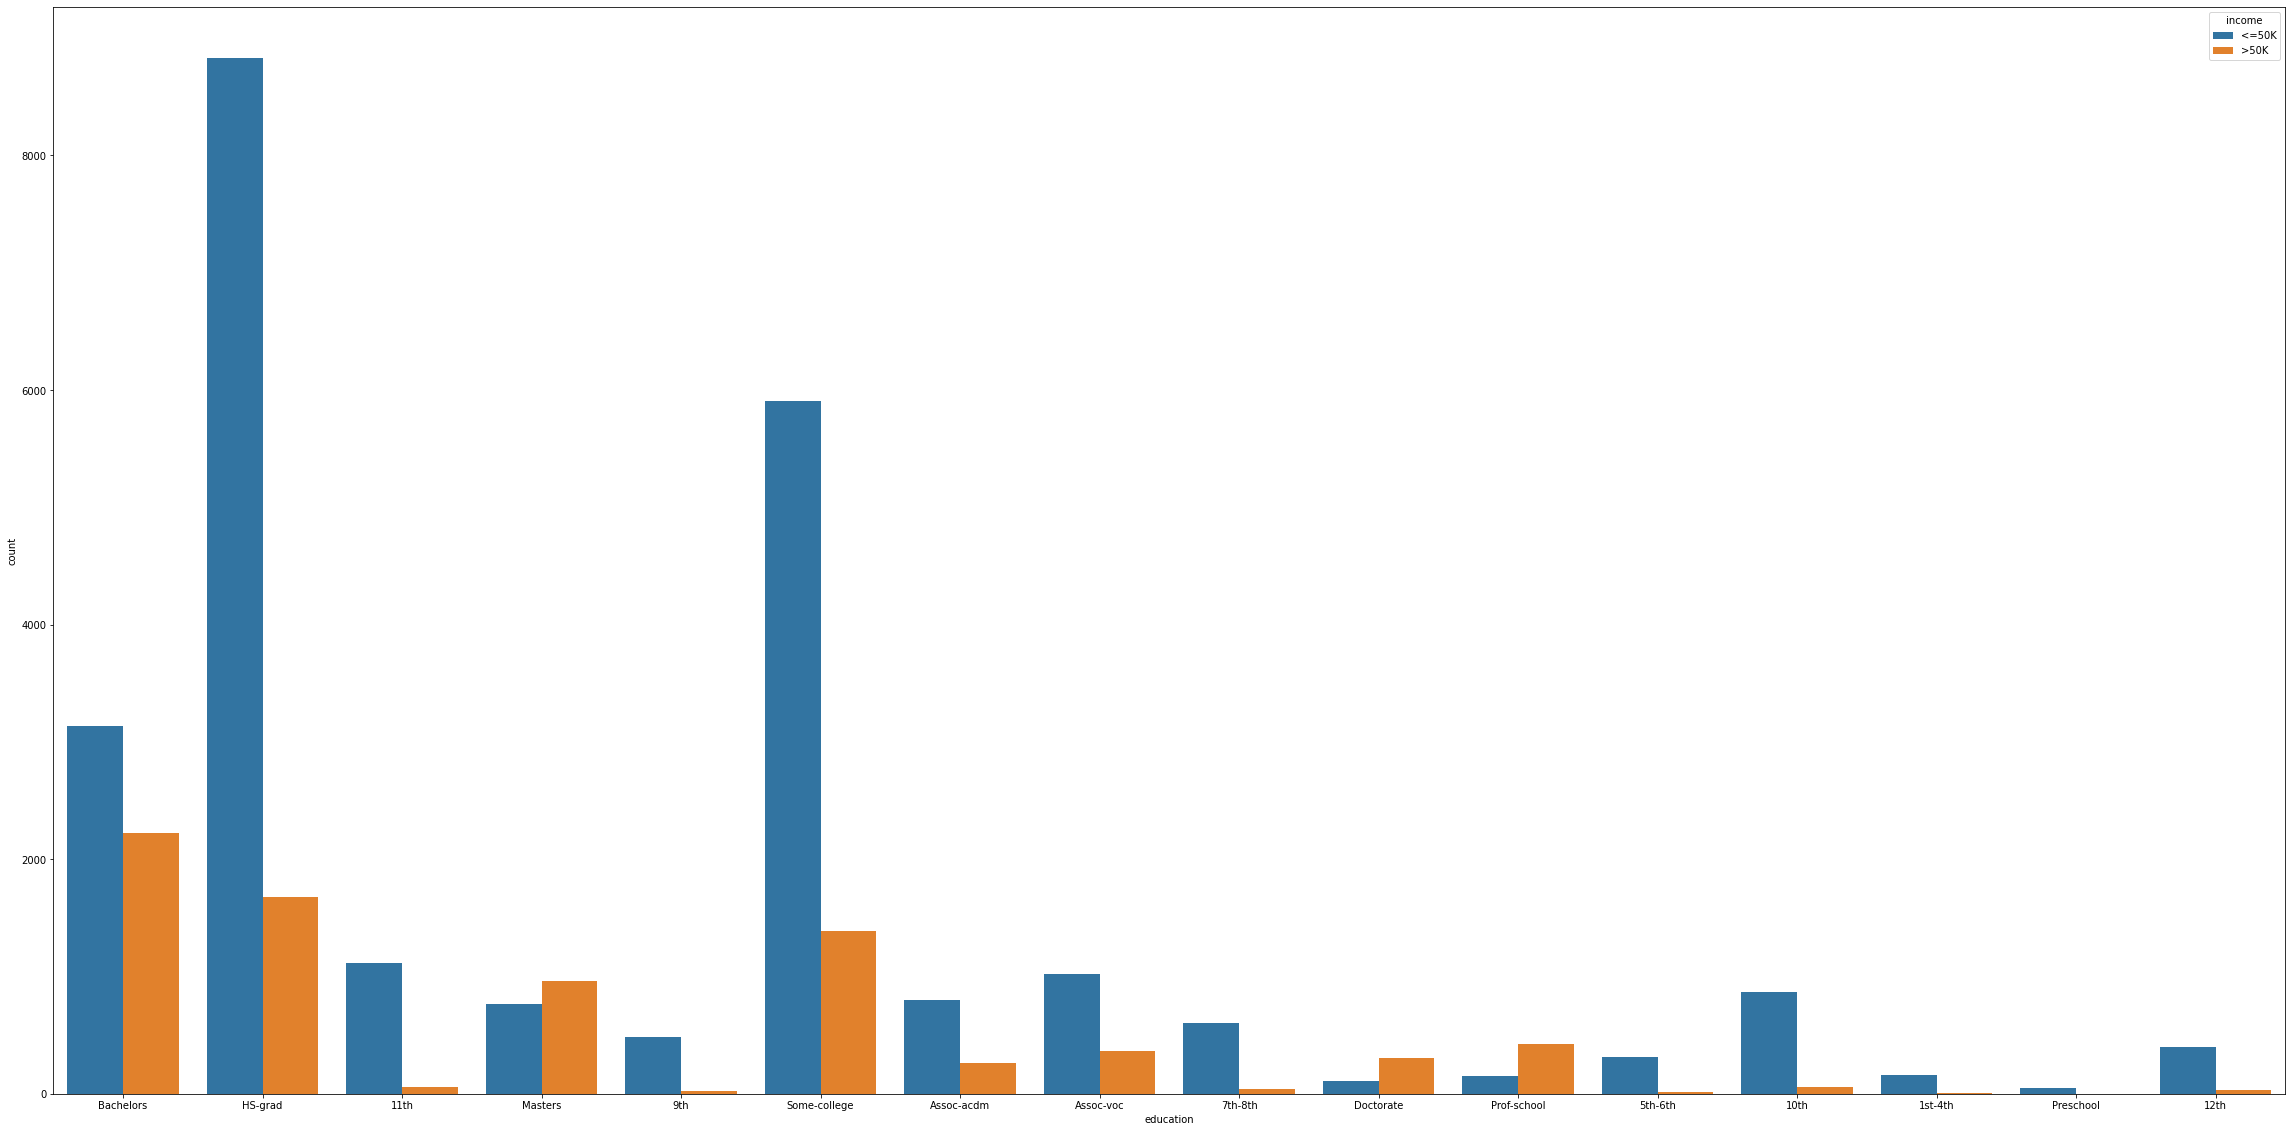

In [14]:
plt.figure(figsize=(40,20))
sns.countplot(data['education'], hue = data['income'])

In [15]:
data['education'].replace(['11th', '9th','Assoc-acdm','Assoc-voc','9th',
                          '7th-8th','12th','1st-4th','10th','5th-6th','Preschool'],
                          ['low','low','Assoc','Assoc','low','low','low',
                          'low','low','low','low'], inplace = True)

In [16]:
data['education'].unique()

array(['Bachelors', 'HS-grad', 'low', 'Masters', 'Some-college', 'Assoc',
       'Doctorate', 'Prof-school'], dtype=object)

### education_num

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num', ylabel='count'>

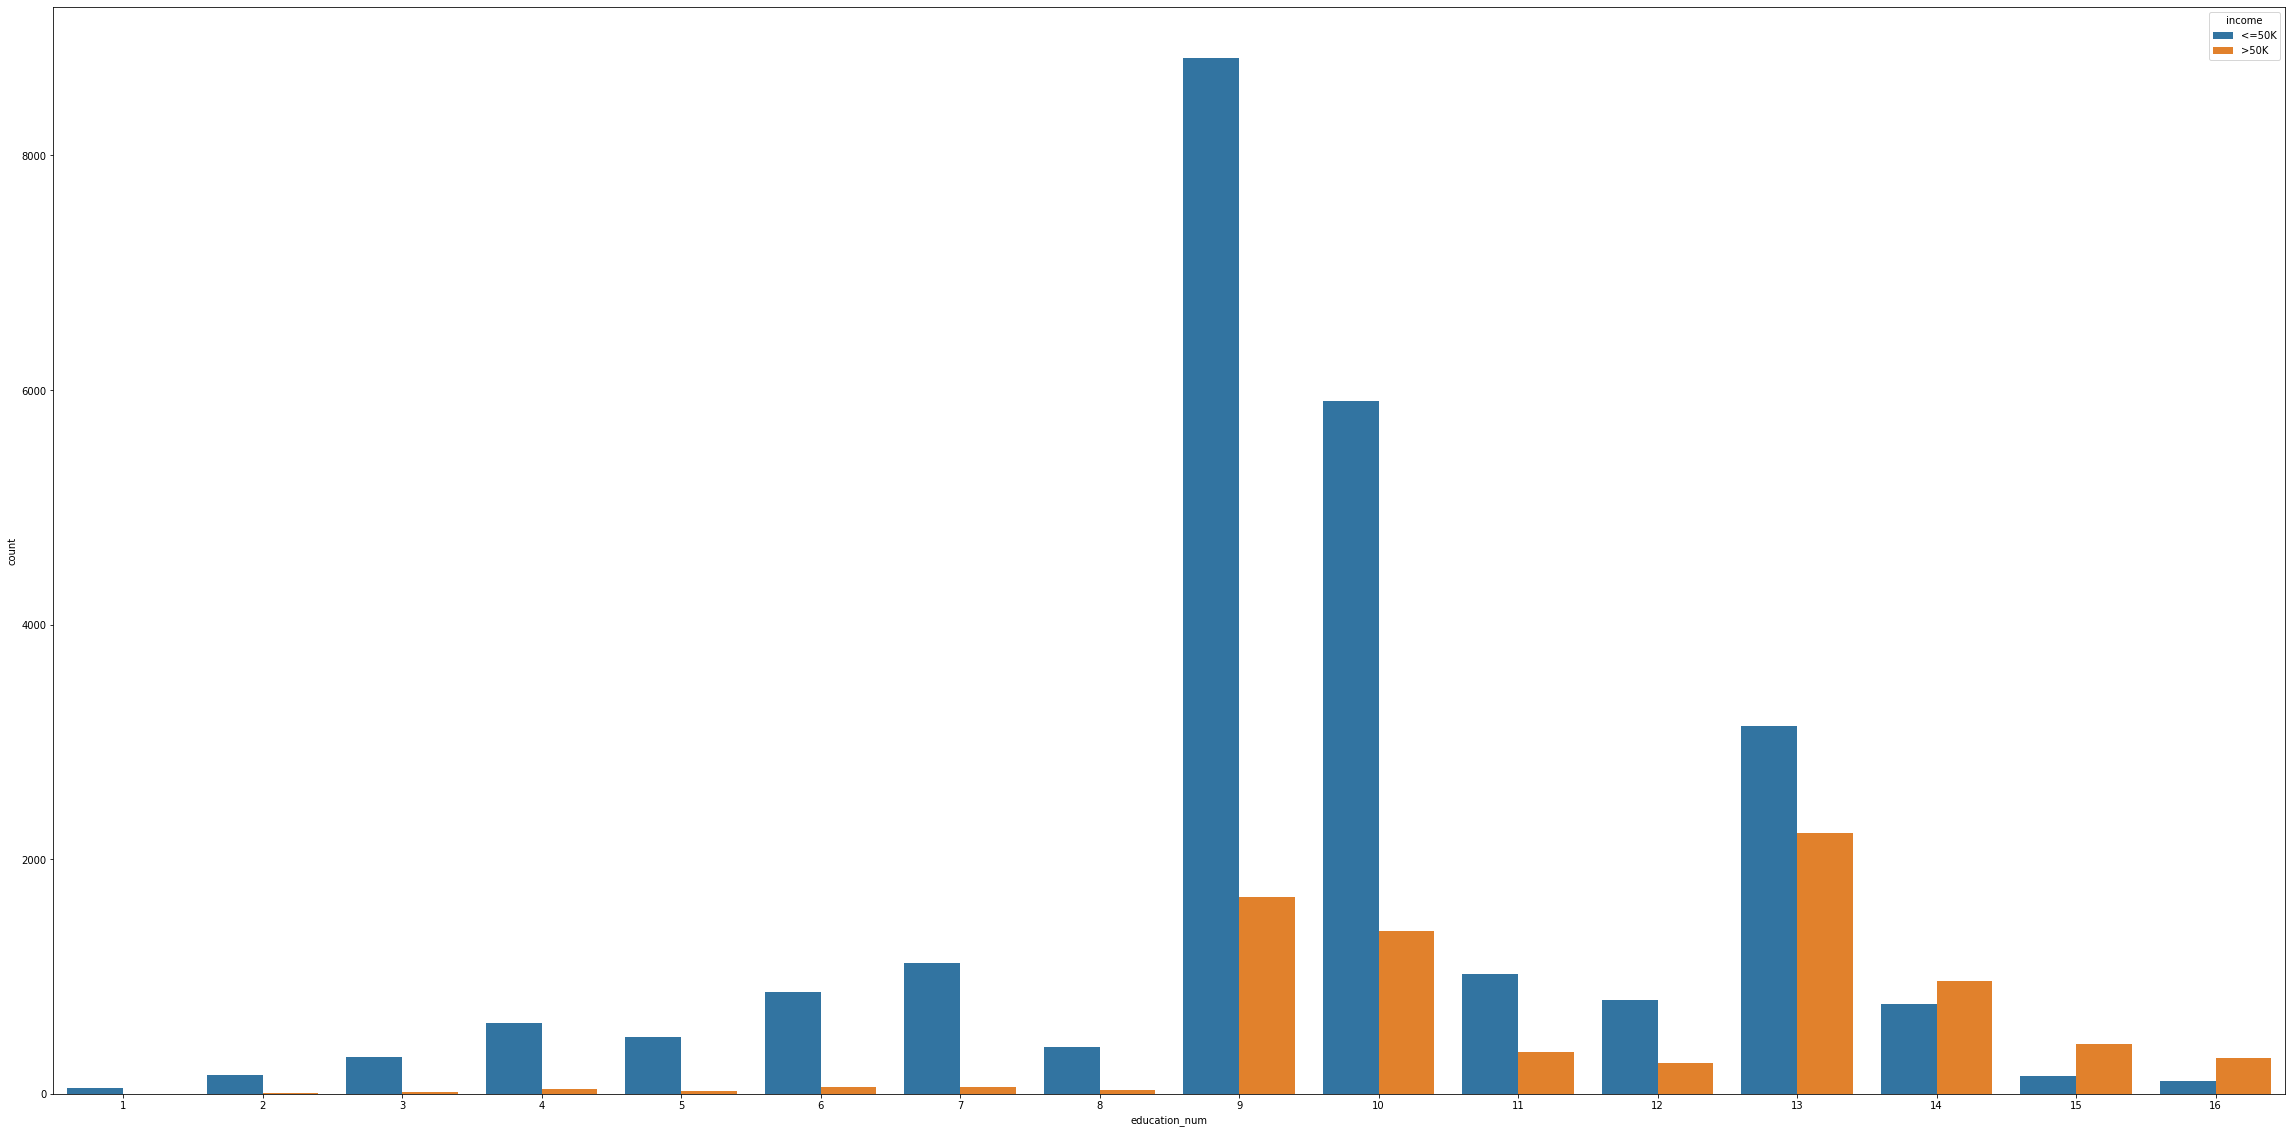

In [17]:
plt.figure(figsize=(40,20))
sns.countplot(data['education_num'], hue = data['income'])

In [18]:
data['education_num'] = preprocessing.scale(data['education_num'])

### marital_status

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital_status', ylabel='count'>

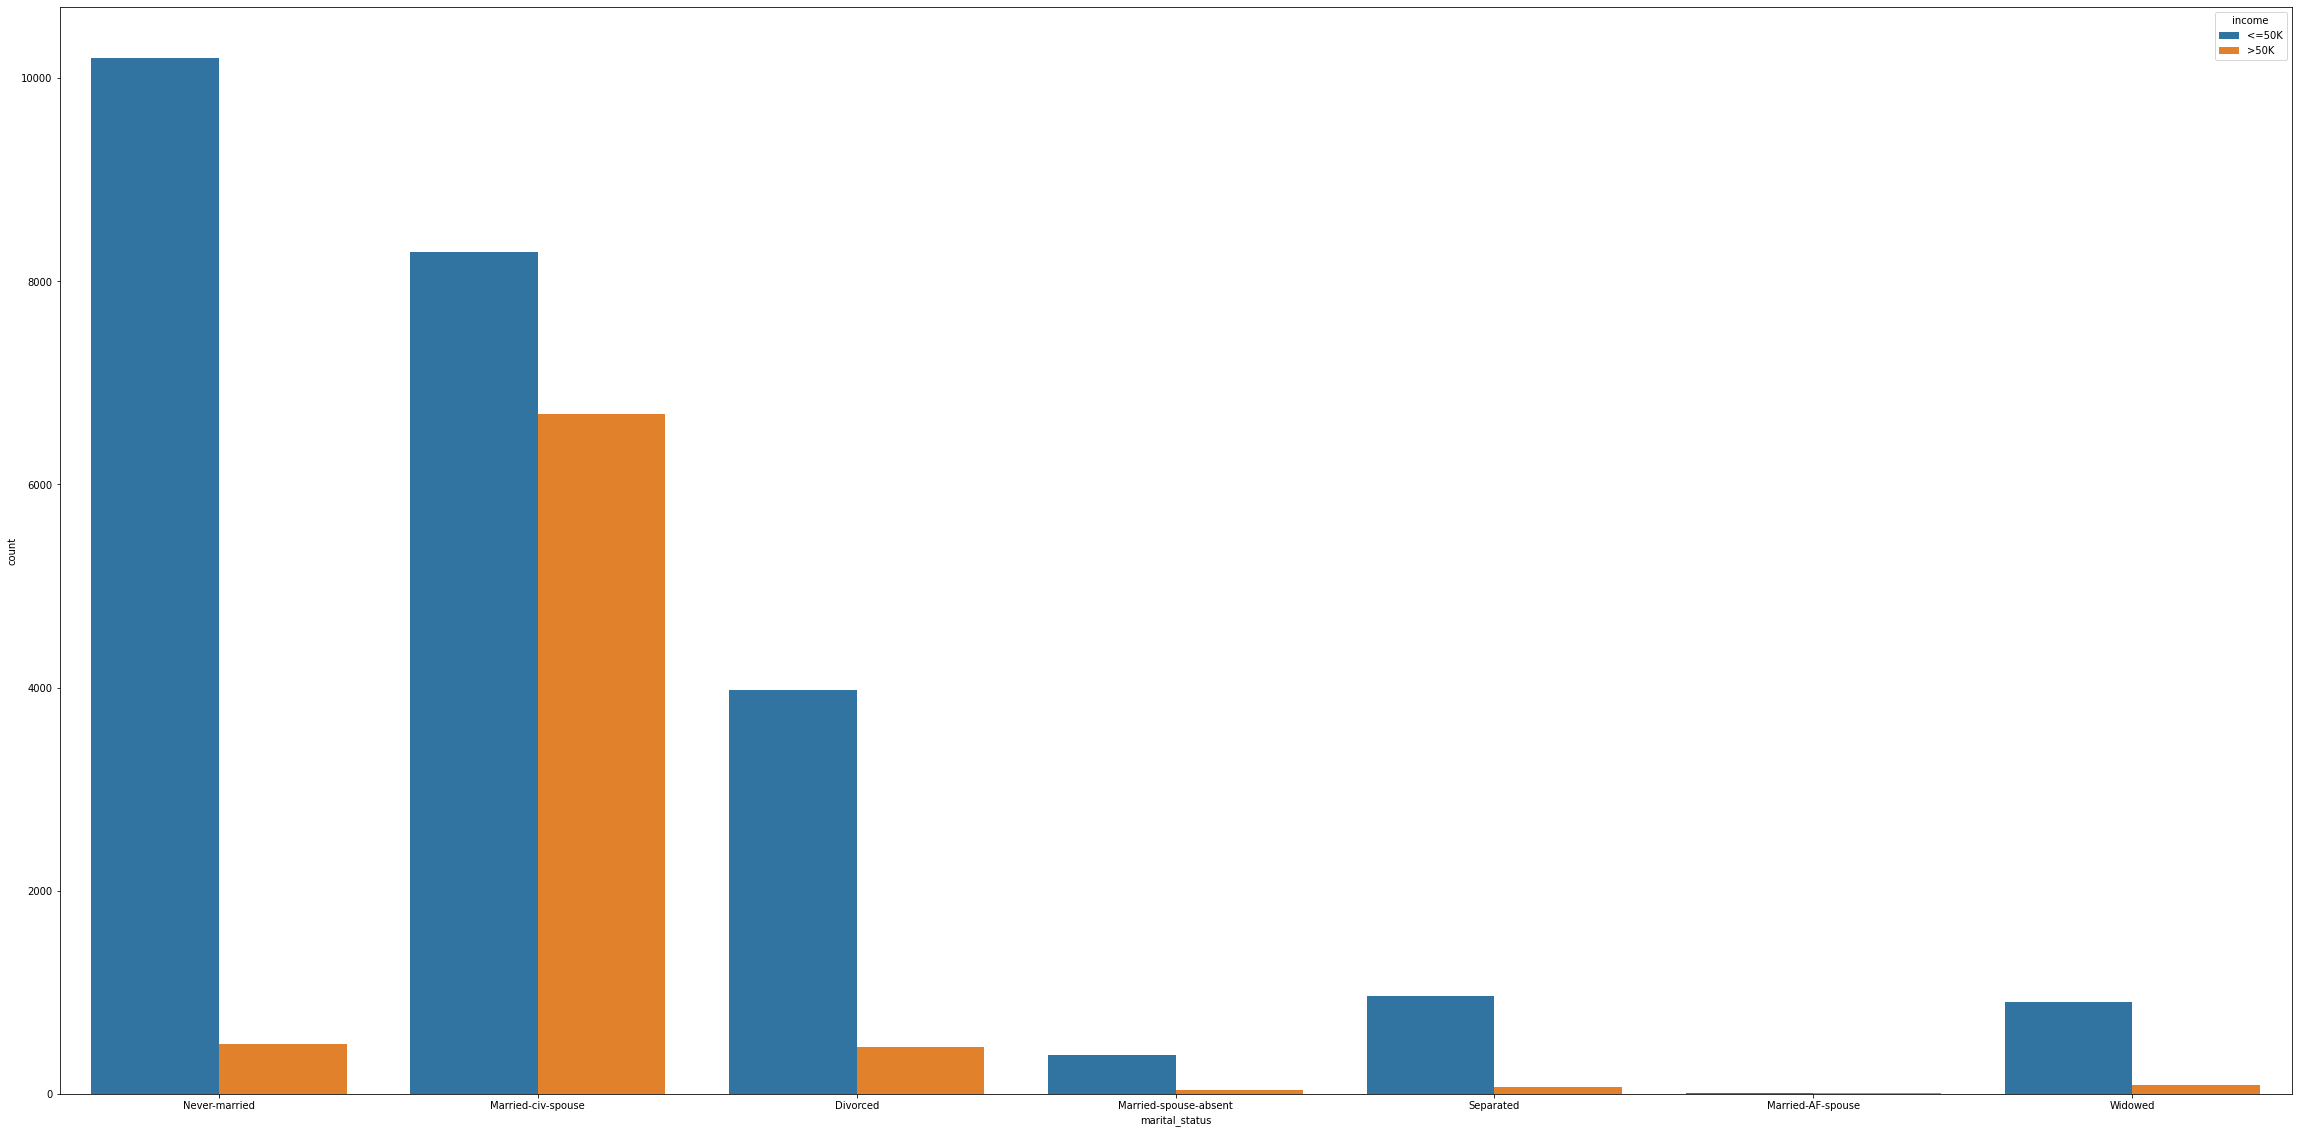

In [19]:
plt.figure(figsize=(40,20))
sns.countplot(data['marital_status'], hue = data['income'])

In [20]:
 data['marital_status'].replace(['Divorced'],
                          ['Separated'], inplace = True)

In [21]:
data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Separated',
       'Married-spouse-absent', 'Married-AF-spouse', 'Widowed'],
      dtype=object)

### relationship

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship', ylabel='count'>

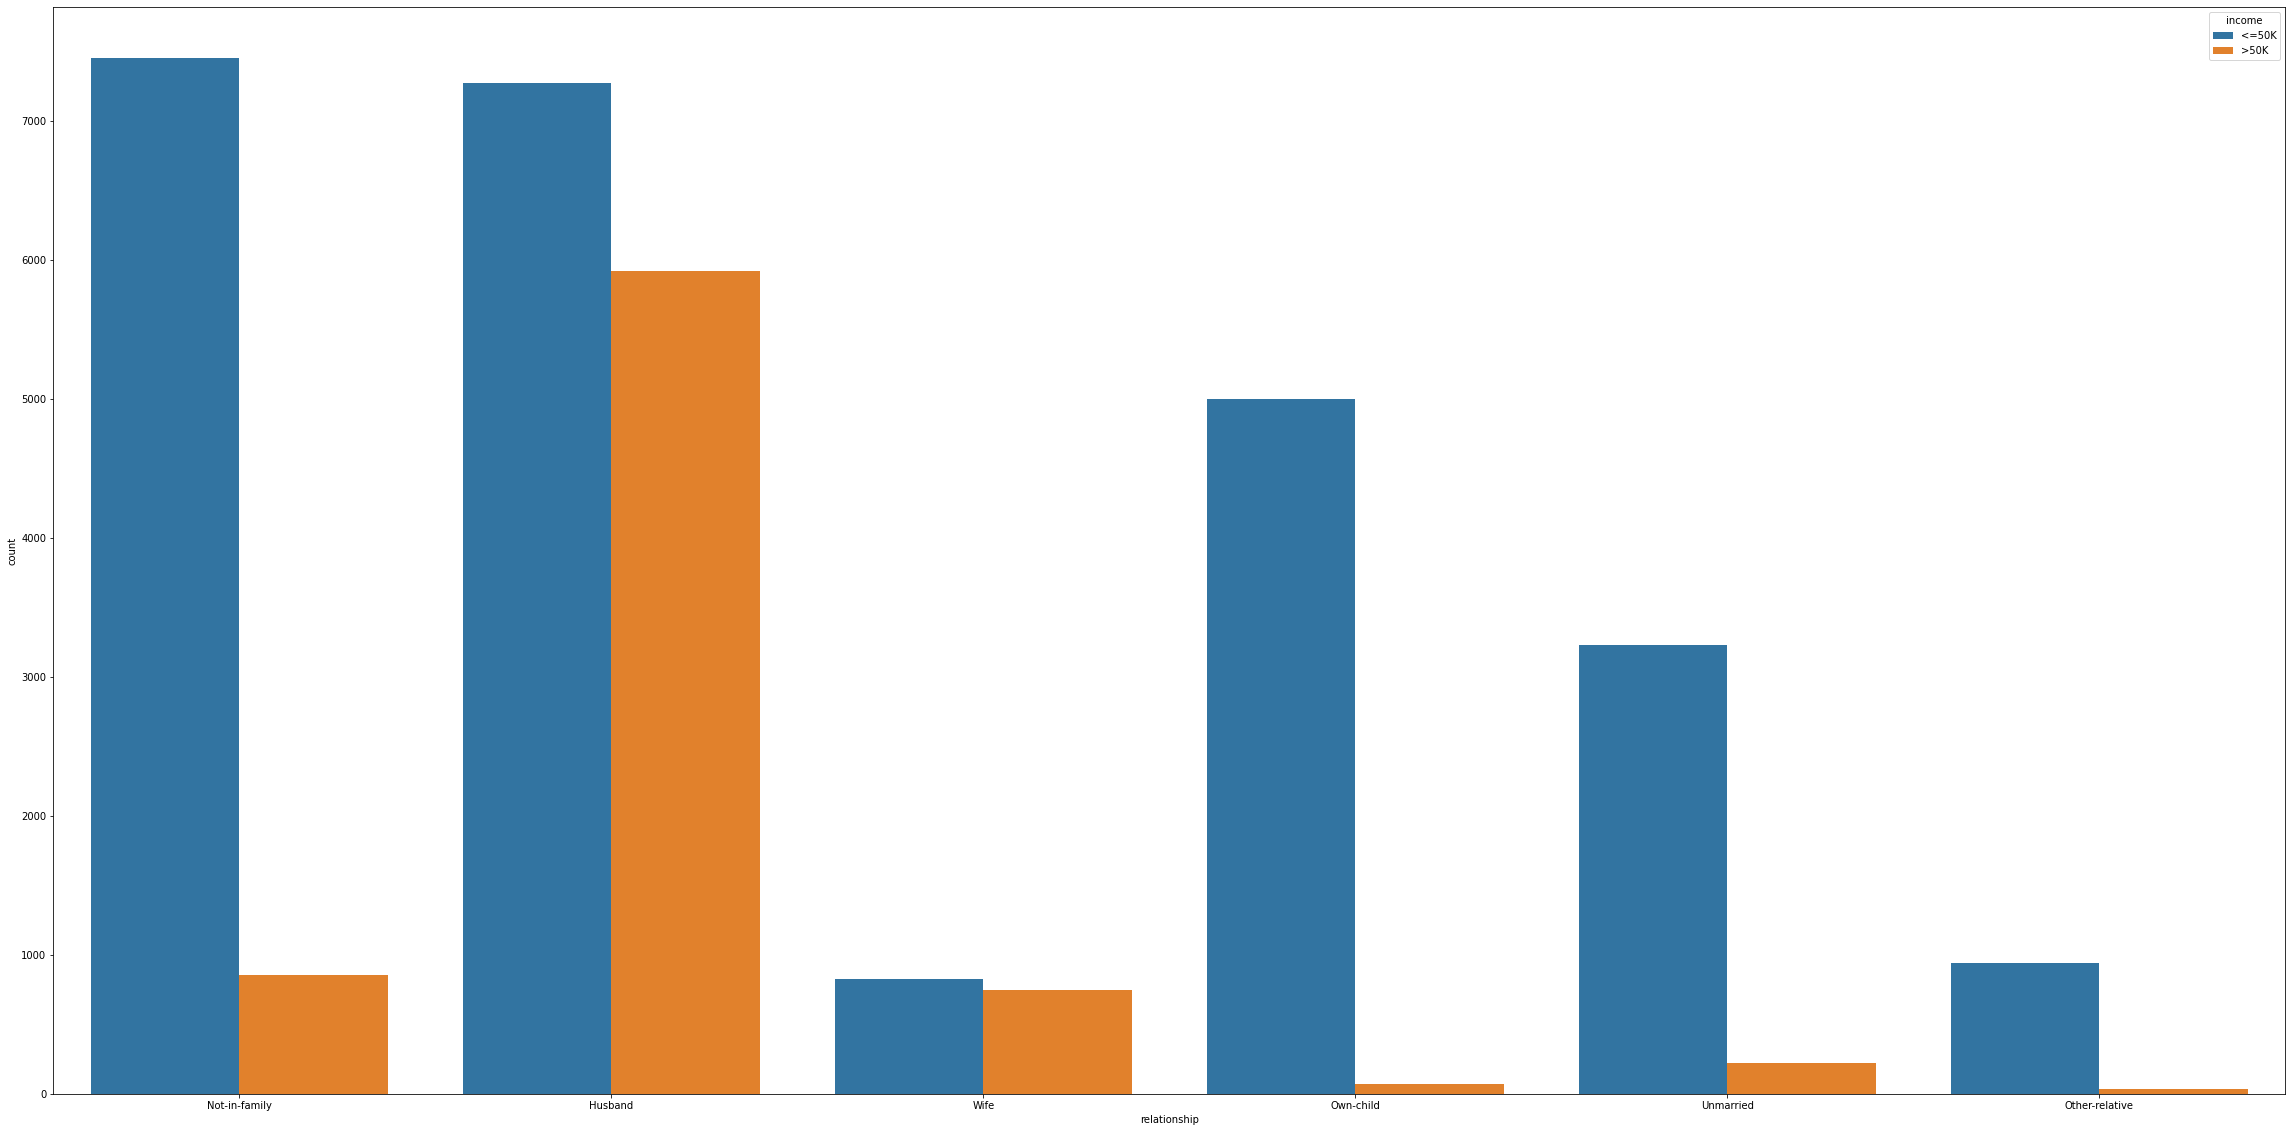

In [22]:
plt.figure(figsize=(40,20))
sns.countplot(data['relationship'], hue = data['income'])

In [23]:
data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

### occupation

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

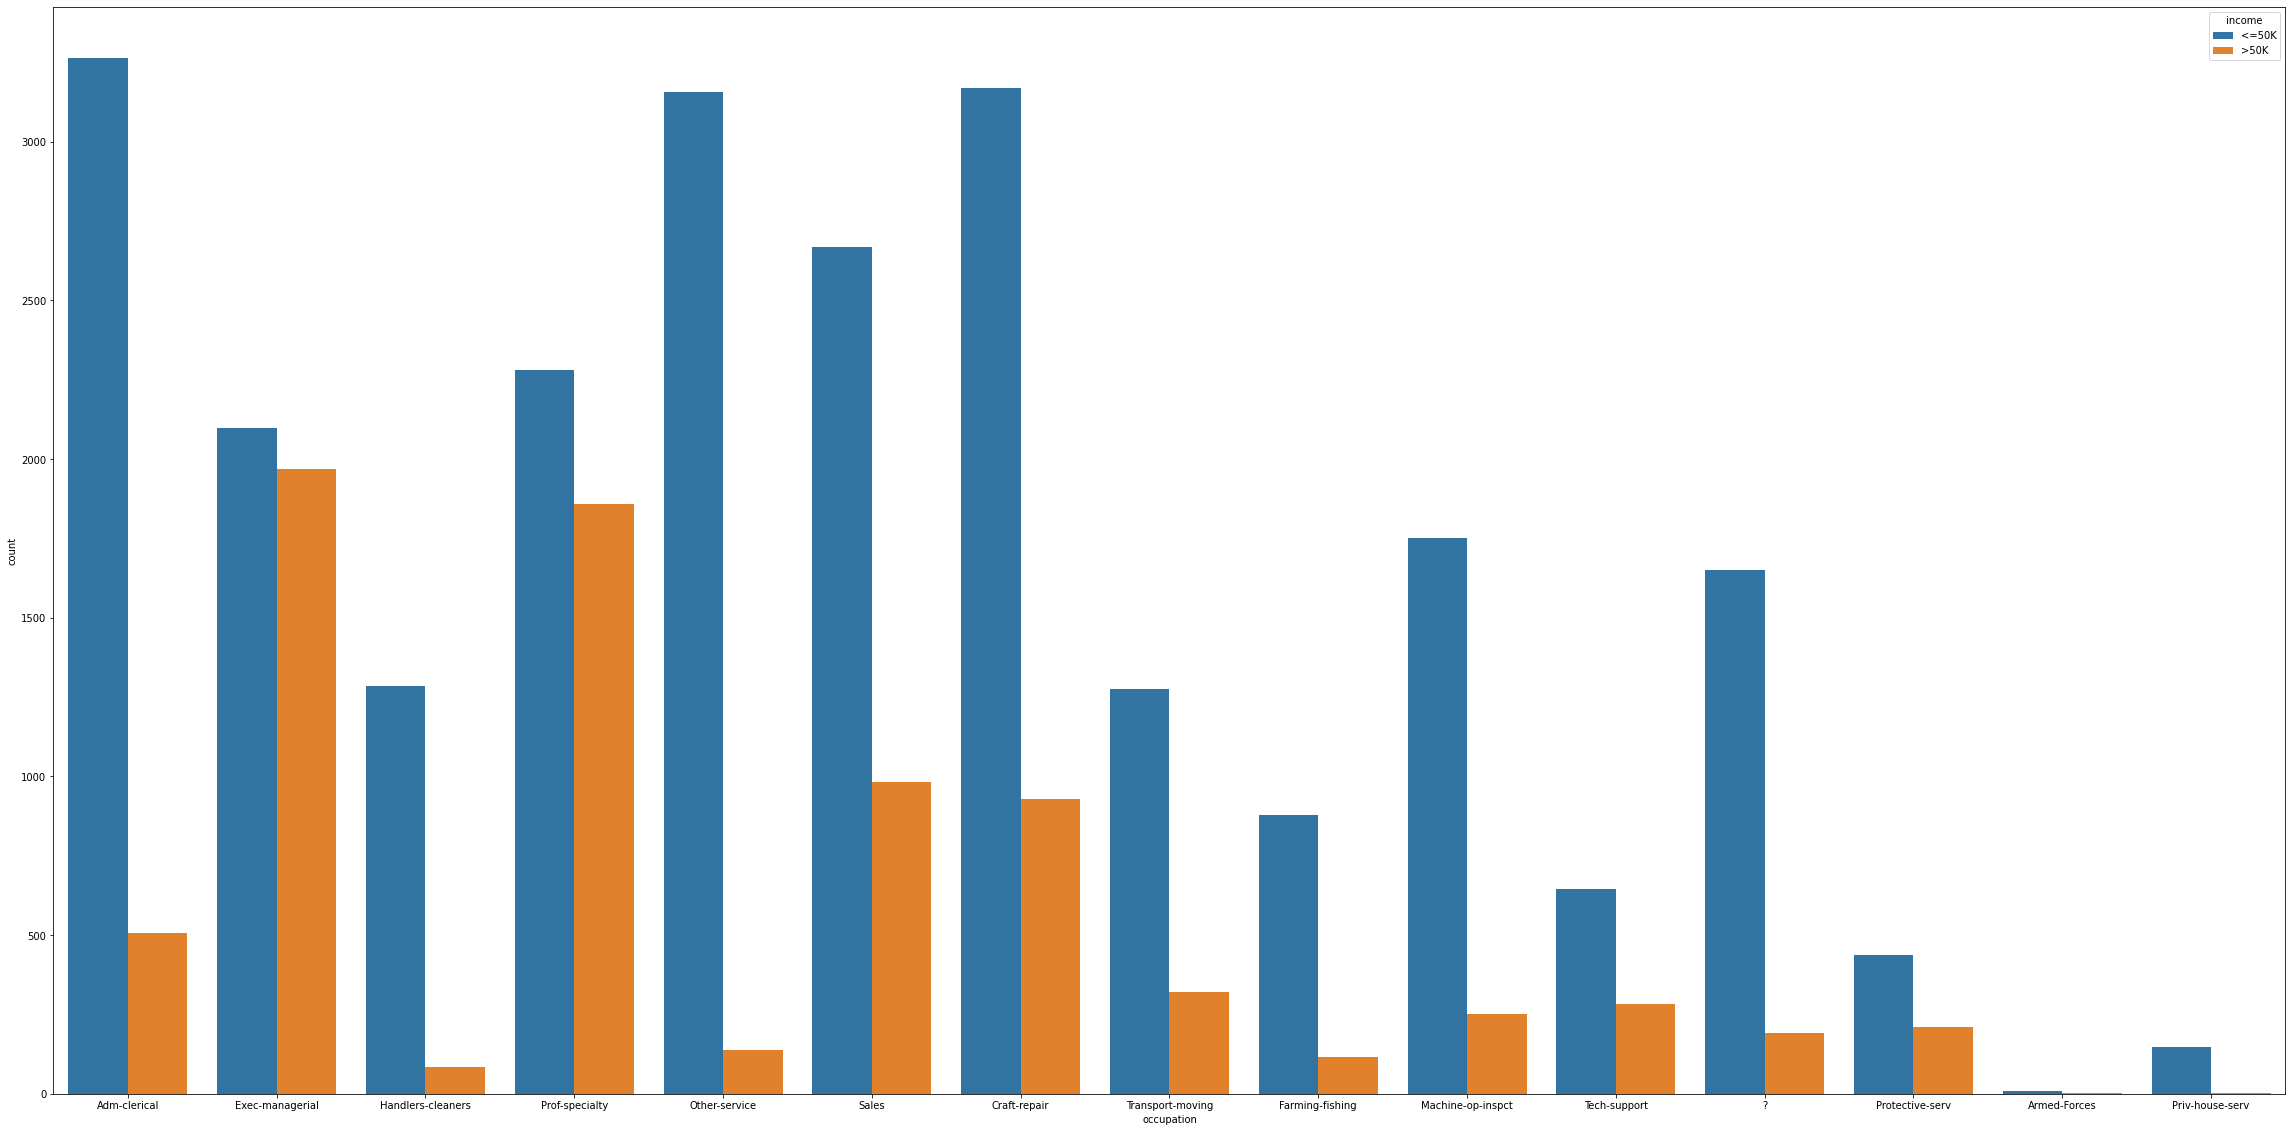

In [24]:
plt.figure(figsize=(40,20))
sns.countplot(data['occupation'], hue = data['income'])

### race

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

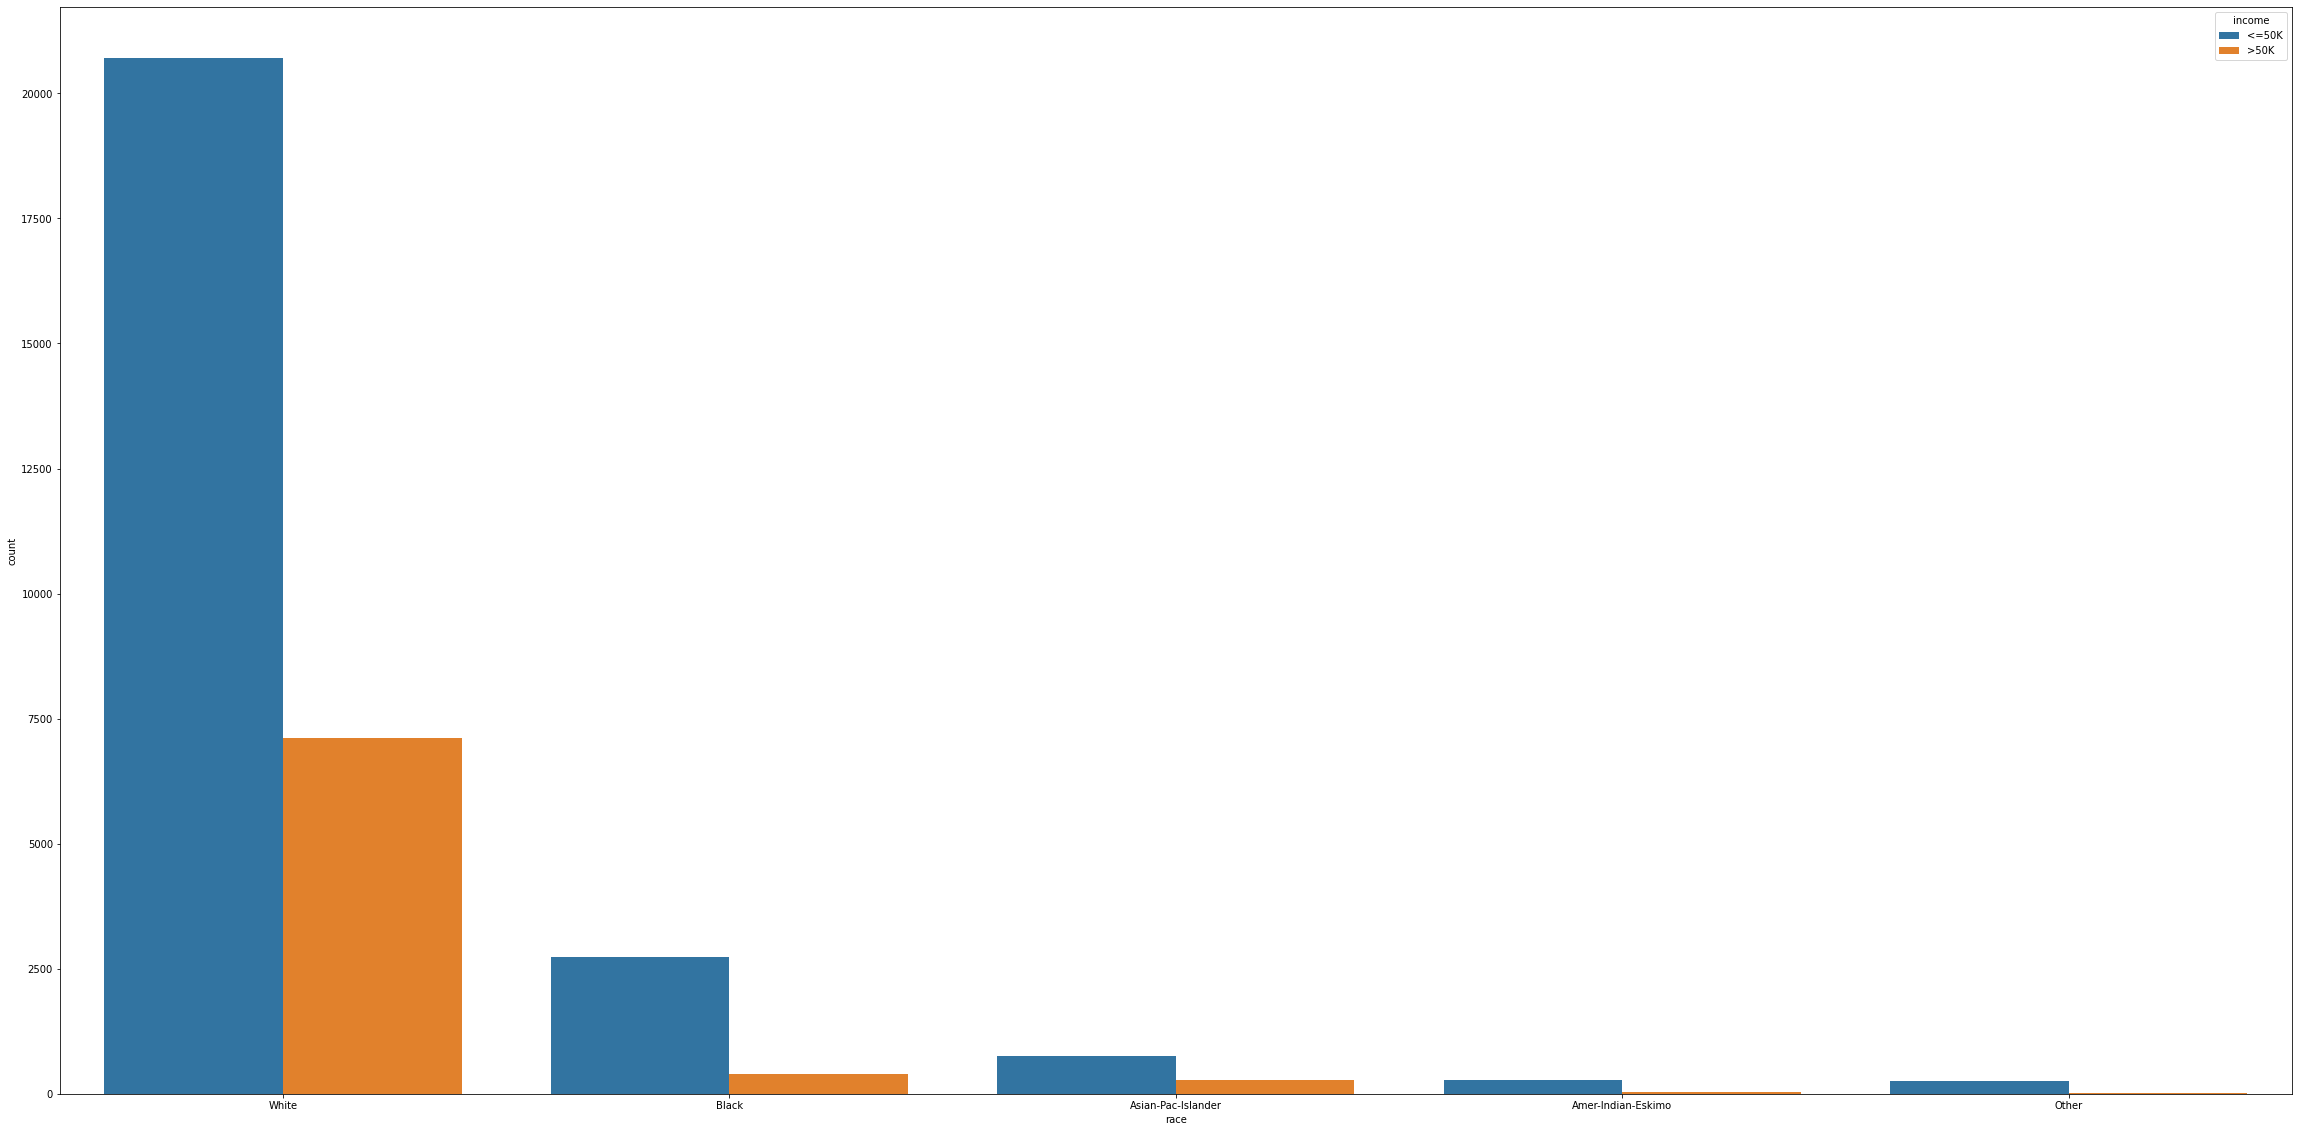

In [25]:
plt.figure(figsize=(40,20))
sns.countplot(data['race'], hue = data['income'])

### capital

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_gain', ylabel='count'>

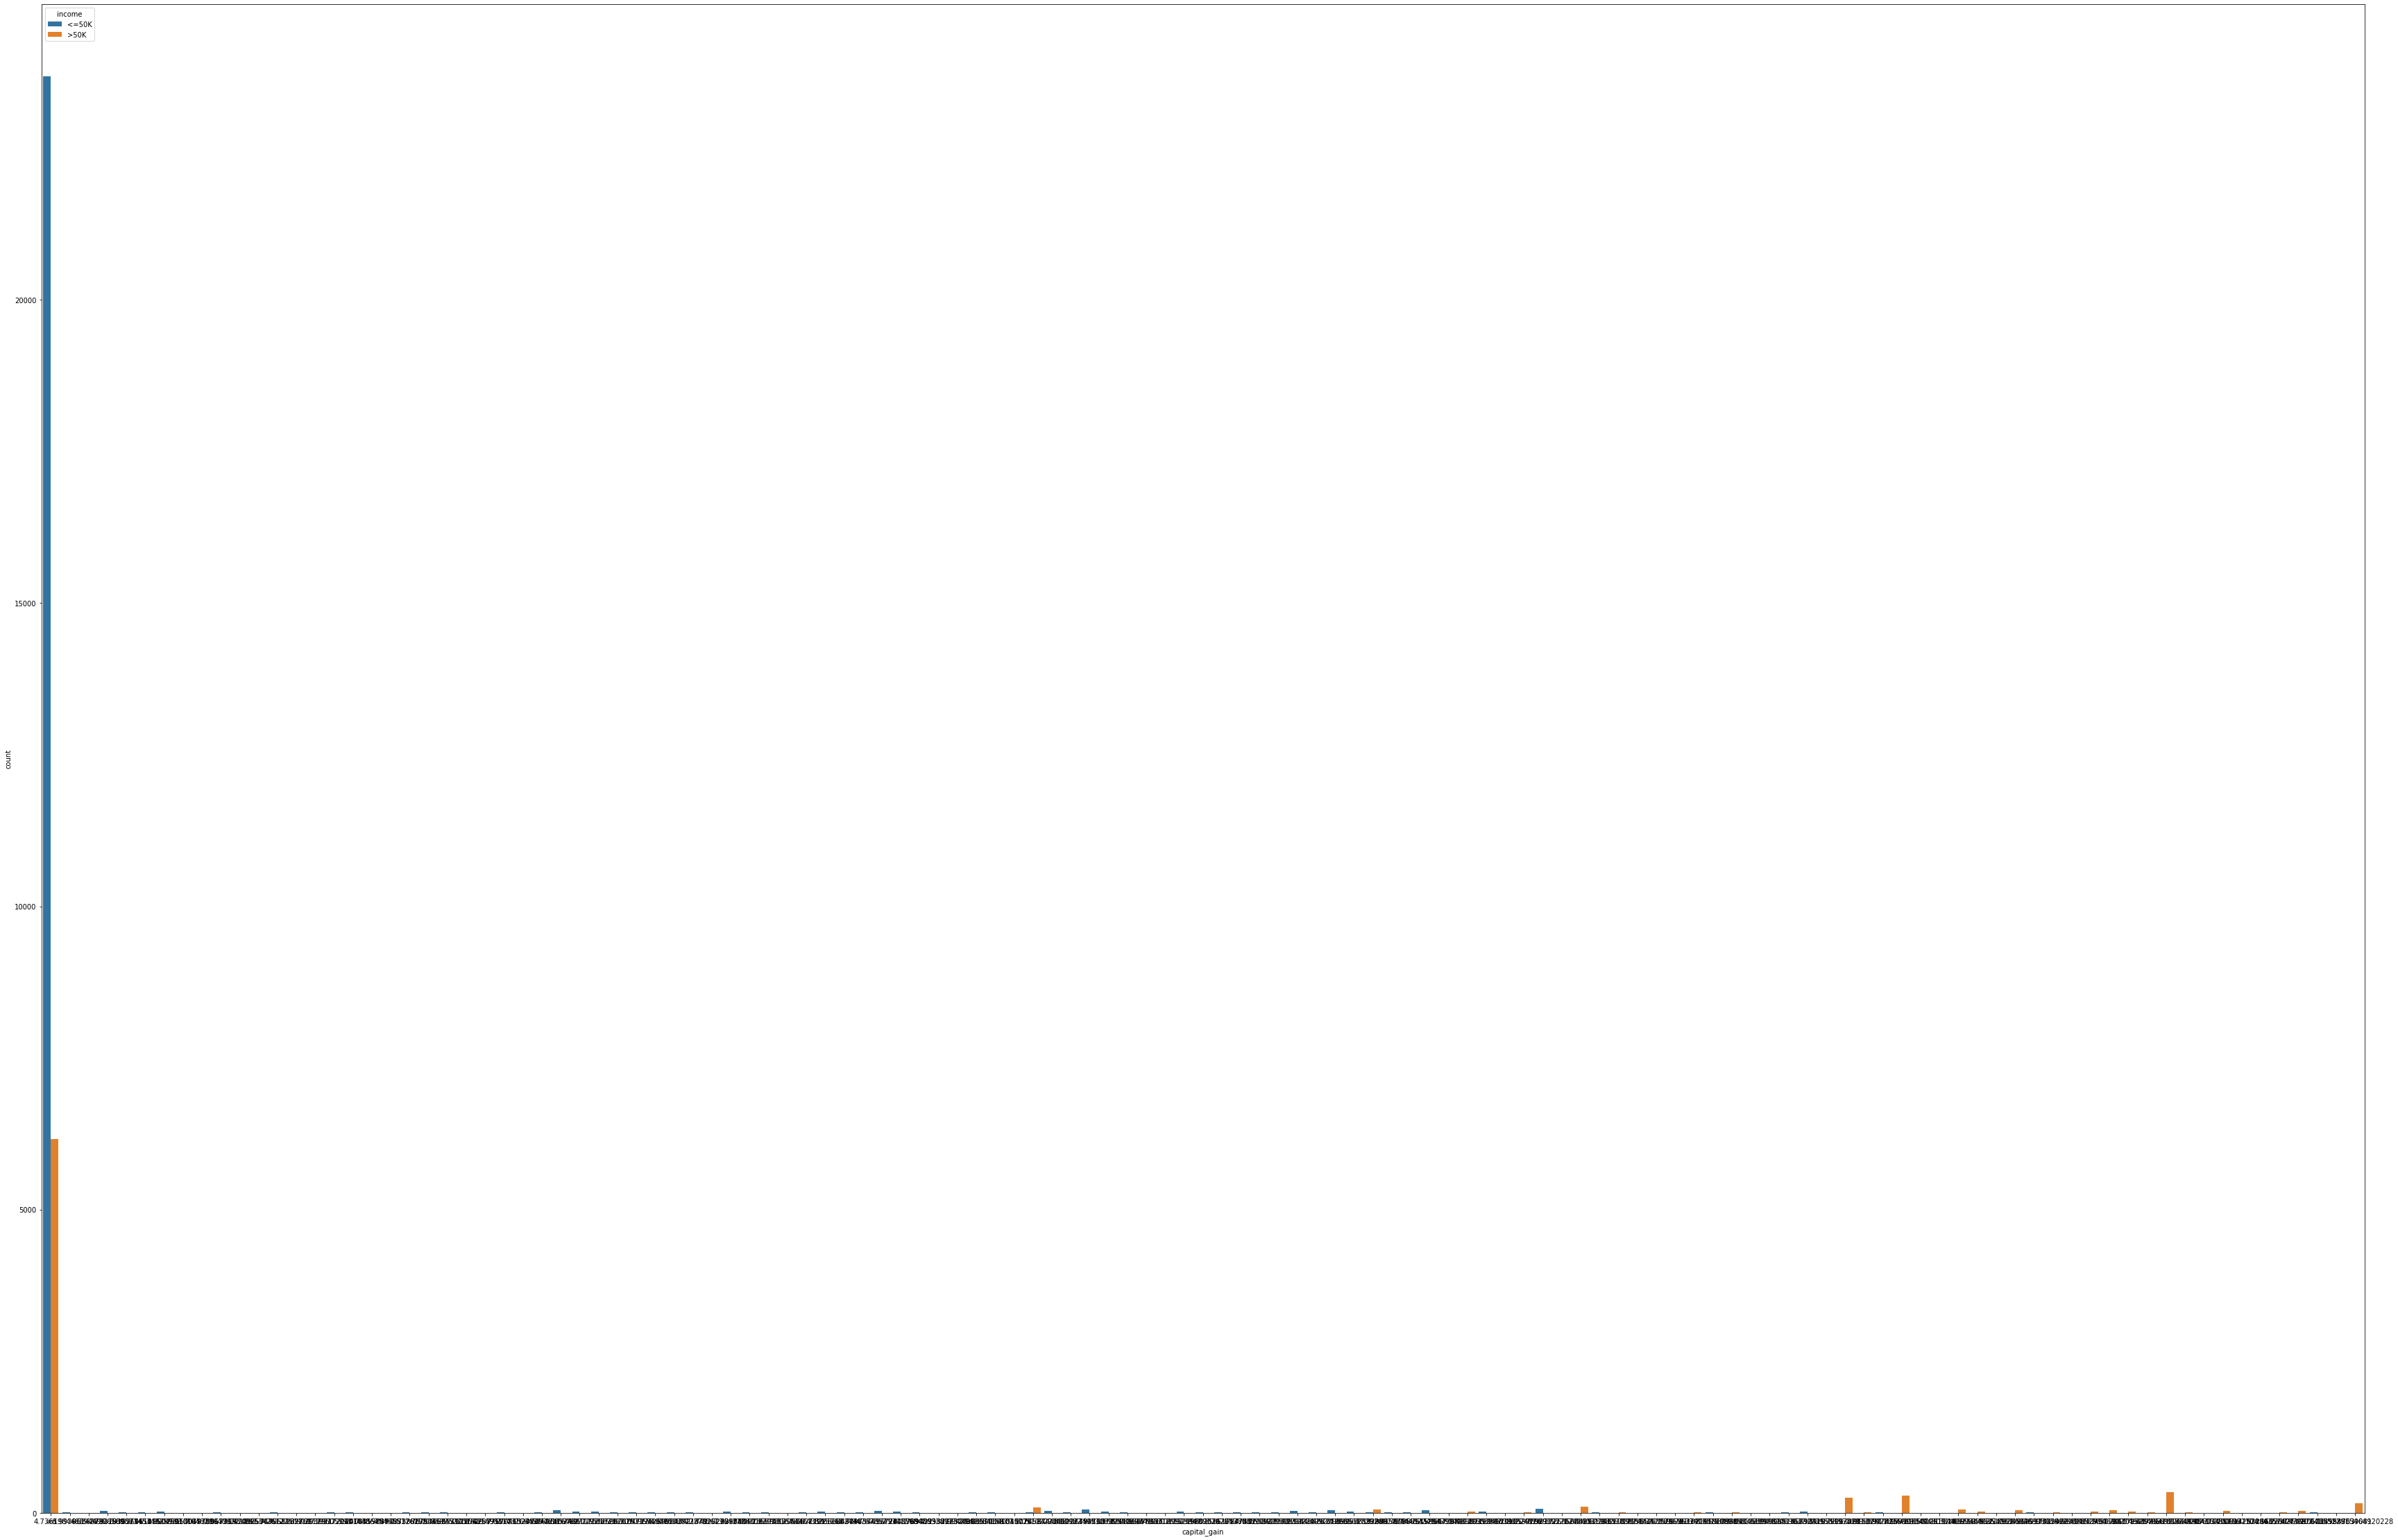

In [26]:
plt.figure(figsize=(60,40))
sns.countplot(np.log(data['capital_gain']), hue = data['income'])

In [27]:

data['capital_gain'] = np.log(data['capital_gain'])
data['capital_loss'] = np.log(data['capital_loss'])

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
data['capital_gain'].replace(-np.inf,-1, inplace = True)
data['capital_loss'].replace(-np.inf,-1, inplace = True)
data['capital_gain'].unique()

array([ 7.68432407, -1.        ,  9.55279468,  8.55217416,  8.51978982,
        7.78613644,  9.57108702,  9.6174042 ,  8.94741595, 10.43690602,
        8.30992299,  8.38617293,  8.89535562,  7.25063551,  8.20903627,
        6.96129605,  8.15017927,  7.62559507,  7.68524361,  6.38687932,
        9.90603431,  8.83185794,  8.31898613,  7.01301579,  9.06114407,
        8.13476078,  7.86211221, 10.13602683,  8.4446225 ,  9.1469745 ,
        7.8091354 ,  8.04012466,  9.26908087,  7.99429499,  8.10922495,
        7.85554468,  8.15219802,  8.48982199, 11.51291546,  8.78170899,
        7.29369772,  7.75319427,  7.65207075,  7.96728018, 10.13157884,
        9.26103349,  7.69712132,  7.99328233, 10.23379799,  8.81981314,
        7.7088596 ,  7.31721241,  9.51414183,  7.87663846,  8.6226337 ,
        8.47365919,  8.2377438 ,  8.05102221,  8.247482  ,  8.27944349,
        6.81783057,  5.99396143,  7.94767857,  7.99867136,  8.5039053 ,
        7.63143166,  7.76387129,  8.6042879 ,  9.61713793,  7.26

### hours_per_week

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week', ylabel='count'>

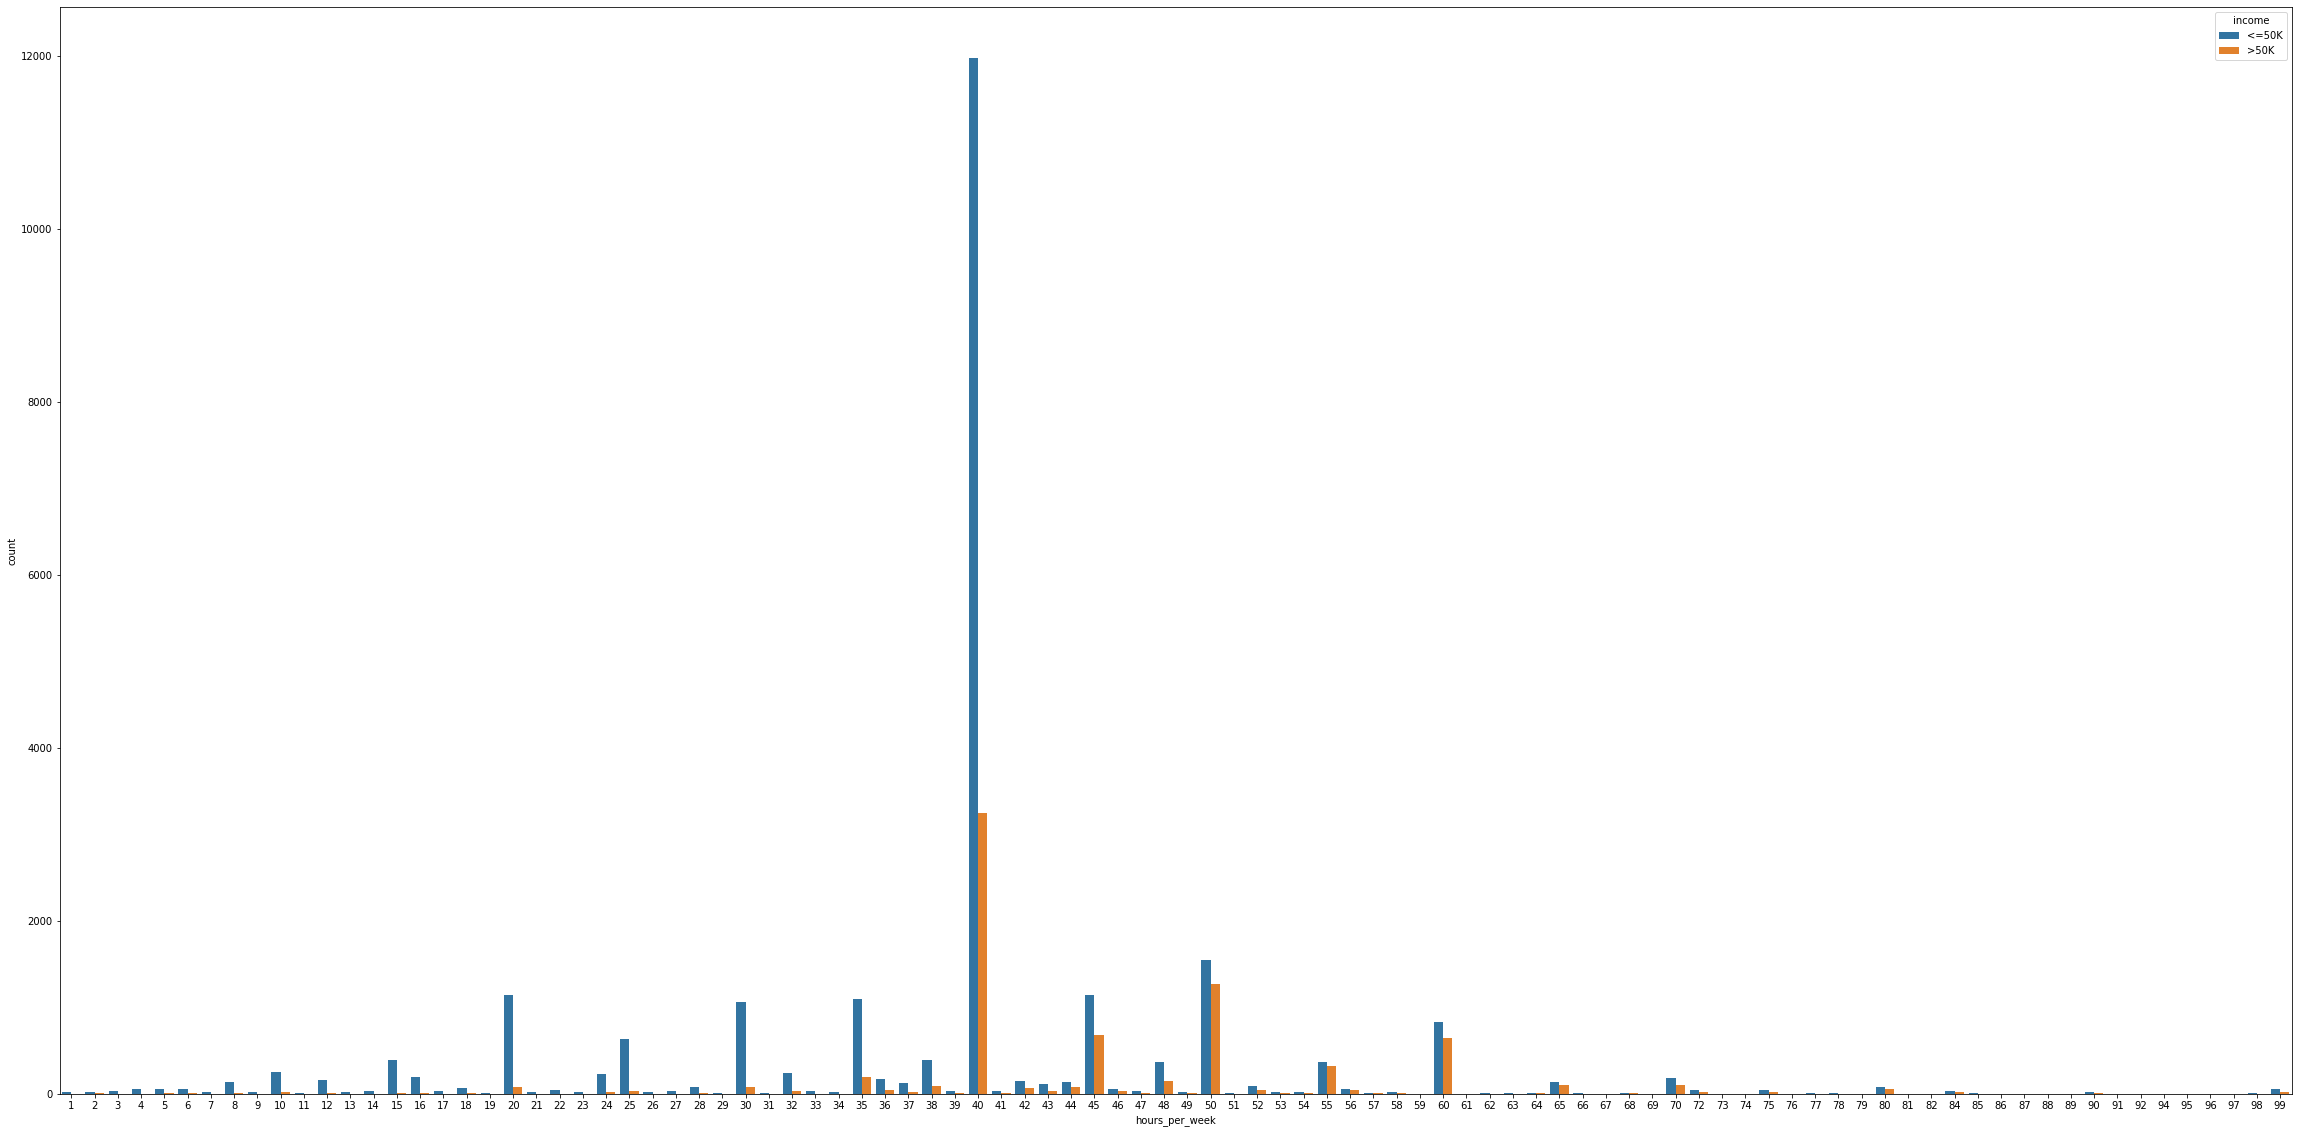

In [29]:
plt.figure(figsize=(40,20))
sns.countplot(data['hours_per_week'], hue = data['income'])

In [30]:
data['hours_per_week'] = preprocessing.scale(data['hours_per_week'])

### native_country

/Users/huangzijing/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='native_country', ylabel='count'>

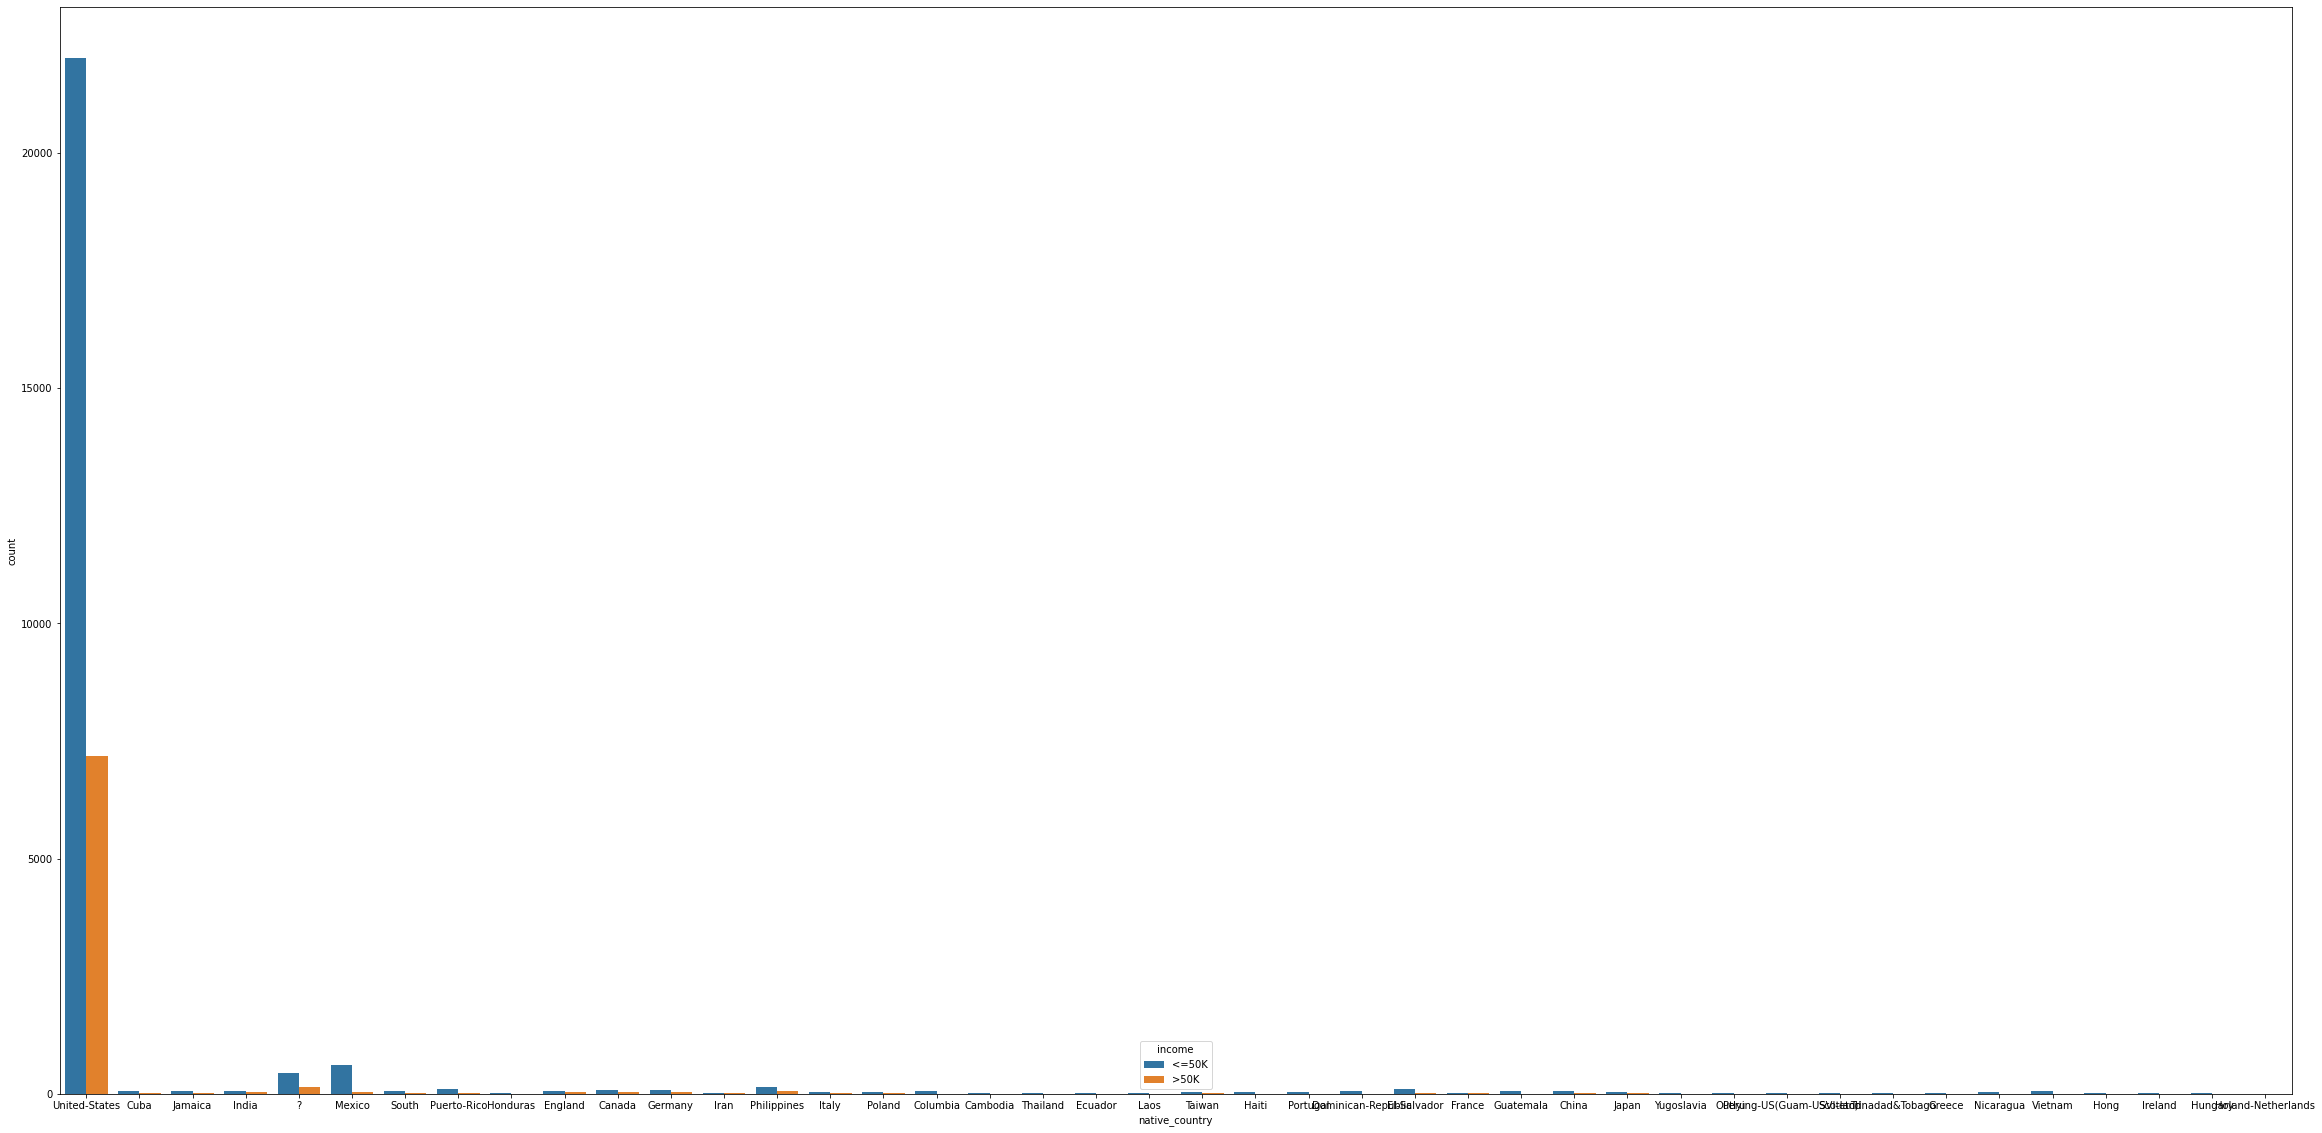

In [31]:
plt.figure(figsize=(40,20))
sns.countplot(data['native_country'], hue = data['income'])

In [32]:
data['native_country'].replace(['Cambodia', 'Puerto_Rico','Cuba','Iran','Honduras',
                          'Philippines','Germeny','Greece','Italy','Poland','Jamaica',
                               'Vietnam','Mexico','Portugal','Ireland','France','Dominican_Republic',
                               'Laso','Ecuador','Taiwan','Japan','Haiti','Columbia','Hungary','Guatemala',
                               'Nicaragua','Scotland','Thailand','Yugoslavia','EI_Salvador',
                               'Trinadad&Tobago','Peru','Holand_Netherlands'],
                          
                               ['South_East_Asia','Mid_America','Mid_America','Mid_Eurpope',
                                'Mid_America','South_East_Asia','Europe','South_Europe','South_Europe',
                                'Mid_Europe','Mid_America','South_East_Asia','Mid_America',
                                'South_Europe','England','Europe','Mid_America','South_East_Asia',
                                'South','East_Asia','East_Asia','Mid_America','South','Mid_Europe','Mid_America',
                                'Mid_America','England','South_East_Asia','South','South',
                               'South','South','Europe'], inplace = True)

In [33]:
data.replace('?', np.nan, inplace = True)

In [34]:
data.isnull().any()

id                False
age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
income             True
dtype: bool

### Deal with native_country

In [35]:
data['native_country'].fillna('United-States', inplace = True)

In [36]:
list(data)

['id',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

# change categorical to num

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              48842 non-null  int64  
 1   age             48842 non-null  int64  
 2   workclass       46043 non-null  object 
 3   fnlwgt          48842 non-null  float64
 4   education       48842 non-null  object 
 5   education_num   48842 non-null  float64
 6   marital_status  48842 non-null  object 
 7   occupation      46033 non-null  object 
 8   relationship    48842 non-null  object 
 9   race            48842 non-null  object 
 10  sex             48842 non-null  object 
 11  capital_gain    48842 non-null  float64
 12  capital_loss    48842 non-null  float64
 13  hours_per_week  48842 non-null  float64
 14  native_country  48842 non-null  object 
 15  income          32561 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 6.0+ MB


In [38]:
data.drop(['education_num'], axis = 1, inplace = True)

In [39]:
data['income'] = data['income'].astype('category').cat.codes
data['workclass'] = data['workclass'].astype('category').cat.codes
data['education'] = data['education'].astype('category').cat.codes
data['marital_status'] = data['marital_status'].astype('category').cat.codes
data['occupation'] = data['occupation'].astype('category').cat.codes
data['relationship'] = data['relationship'].astype('category').cat.codes
data['race'] = data['race'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes
data['native_country'] = data['native_country'].astype('category').cat.codes

In [40]:
data[data['id'] == 1]

,id,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,39,6,11.25824,1,3,0,1,4,1,7.684324,-1.0,-0.034087,20,0


# fit model predict workclass

In [41]:
work_train_X = data[data['workclass'] != -1].drop(['income', 'workclass','id'],
                                                 axis = 1)
work_train_y = data[data['workclass'] != -1]['workclass'] 
work_test_X = data[data['workclass'] == -1].drop(['income', 'workclass','id'],
                                                axis = 1)
work_test_y = data[data['workclass'] == -1]['income']
ind_W = data[data['workclass'] == -1]['id']

In [42]:
work_train_X

,age,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,11.258240,1,3,0,1,4,1,7.684324,-1.0,-0.034087,20
1,50,11.330336,1,1,3,0,4,1,-1.000000,-1.0,-2.213032,20
2,38,12.281393,3,4,5,1,4,1,-1.000000,-1.0,-0.034087,20
3,53,12.366153,7,1,5,0,2,1,-1.000000,-1.0,-0.034087,20
4,28,12.732011,1,1,9,5,2,0,-1.000000,-1.0,-0.034087,12
...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,12.409874,1,3,9,3,4,1,-1.000000,-1.0,-0.034087,20
48837,39,12.280340,1,4,9,1,4,0,-1.000000,-1.0,-0.356894,20
48839,38,12.834636,1,1,9,0,4,1,-1.000000,-1.0,0.772930,20
48840,44,11.337274,1,4,0,3,1,1,8.604288,-1.0,-0.034087,20


In [44]:
from xgboost import XGBClassifier
xlf = XGBClassifier(max_depth=10,
                        learning_rate=0.1,
                        n_estimators=2000,
                        silent=True,
                        nthread=-1,
                        gamma=0,
                        subsample=0.85,
                        colsample_bytree=0.8,)
xlf.fit(work_train_X, work_train_y)
pred = xlf.predict(work_test_X)

[12:34:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(n_estimators = 2000)
# rfc.fit(work_train_X, work_train_y)
# pred = rfc.predict(work_test_X)


In [45]:
work_test_X.reset_index(inplace = True, drop = True)
ind_W.reset_index(inplace = True, drop = True)

data_W = {'workclass':pred}
df = pd.DataFrame(data_W)


work_test_y.reset_index(inplace = True, drop = True)


work_test_X_new = pd.concat([ind_W, df, work_test_X, work_test_y], axis = 1)
work_test_X_new

,id,workclass,age,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,28,3,54,12.101884,6,1,-1,0,1,1,-1.000000,-1.0,1.579946,17,1
1,62,3,32,12.591117,7,2,-1,1,4,1,-1.000000,-1.0,-0.034087,20,0
2,70,2,25,12.209472,6,3,-1,3,4,1,-1.000000,-1.0,-0.034087,20,0
3,78,2,67,12.267915,7,1,-1,0,4,1,-1.000000,-1.0,-3.100750,20,0
4,107,2,17,12.627651,7,3,-1,3,4,0,10.436906,-1.0,-0.679700,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,48683,3,61,12.488243,6,1,-1,0,4,1,-1.000000,-1.0,-2.132330,20,-1
2795,48770,2,21,12.267455,6,3,-1,3,4,0,-1.000000,-1.0,-0.841104,20,-1
2796,48801,2,73,11.883606,3,1,-1,0,4,1,-1.000000,-1.0,-1.244612,0,-1
2797,48813,2,81,10.192831,0,1,-1,0,4,1,7.984803,-1.0,-1.648120,20,-1


In [46]:
data = data[data['workclass'] != -1].append(work_test_X_new)

# fit model predict occupation

In [47]:
data[data['occupation'] == -1]

,id,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5361,5362,18,2,12.237373,7,3,-1,3,4,1,-1.000000,-1.0,-0.034087,20,0
10845,10846,23,2,12.147039,7,4,-1,1,4,1,-1.000000,-1.0,-0.437595,20,0
14772,14773,17,2,12.376962,7,3,-1,3,4,1,-1.000000,-1.0,-0.841104,20,0
20337,20338,18,2,11.964835,7,3,-1,3,4,0,-1.000000,-1.0,-2.455137,20,0
23232,23233,20,2,13.043956,6,3,-1,3,2,1,-1.000000,-1.0,-0.034087,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,48683,61,3,12.488243,6,1,-1,0,4,1,-1.000000,-1.0,-2.132330,20,-1
2795,48770,21,2,12.267455,6,3,-1,3,4,0,-1.000000,-1.0,-0.841104,20,-1
2796,48801,73,2,11.883606,3,1,-1,0,4,1,-1.000000,-1.0,-1.244612,0,-1
2797,48813,81,2,10.192831,0,1,-1,0,4,1,7.984803,-1.0,-1.648120,20,-1


In [ ]:
plt.figure(figsize=(40,20))
sns.countplot(data['occupation'])

In [48]:
occup_train_X = data[data['occupation'] != -1].drop(['income', 'occupation','id'],
                                                 axis = 1)
occup_train_y = data[data['occupation'] != -1]['occupation'] 
occup_test_X = data[data['occupation'] == -1].drop(['income', 'occupation','id'],
                                                axis = 1)
occup_test_y = data[data['occupation'] == -1]['income']
ind_O = data[data['occupation'] == -1]['id']


xlf.fit(occup_train_X, occup_train_y)
pred = xlf.predict(occup_test_X)


# rfc = RandomForestClassifier(n_estimators = 2000)
# rfc.fit(occup_train_X, occup_train_y)
# pred = rfc.predict(occup_test_X)

[12:55:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [49]:
occup_test_X.reset_index(inplace = True, drop = True)
ind_O.reset_index(inplace = True, drop = True)

data_O = {'occupation':pred}
df = pd.DataFrame(data_O)

occup_test_y.reset_index(inplace = True, drop = True)


occup_test_X_new = pd.concat([ind_O, df, occup_test_X, occup_test_y]
                             , axis = 1)
occup_test_X_new

,id,occupation,age,workclass,fnlwgt,education,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,5362,5,18,2,12.237373,7,3,3,4,1,-1.000000,-1.0,-0.034087,20,0
1,10846,7,23,2,12.147039,7,4,1,4,1,-1.000000,-1.0,-0.437595,20,0
2,14773,4,17,2,12.376962,7,3,3,4,1,-1.000000,-1.0,-0.841104,20,0
3,20338,11,18,2,11.964835,7,3,3,4,0,-1.000000,-1.0,-2.455137,20,0
4,23233,5,20,2,13.043956,6,3,3,2,1,-1.000000,-1.0,-0.034087,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,48683,13,61,3,12.488243,6,1,0,4,1,-1.000000,-1.0,-2.132330,20,-1
2805,48770,0,21,2,12.267455,6,3,3,4,0,-1.000000,-1.0,-0.841104,20,-1
2806,48801,0,73,2,11.883606,3,1,0,4,1,-1.000000,-1.0,-1.244612,0,-1
2807,48813,11,81,2,10.192831,0,1,0,4,1,7.984803,-1.0,-1.648120,20,-1


In [50]:
data = data[data['occupation'] != -1].append(occup_test_X_new)
data

,id,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,39,6,11.258240,1,3,0,1,4,1,7.684324,-1.0,-0.034087,20,0
1,2,50,5,11.330336,1,1,3,0,4,1,-1.000000,-1.0,-2.213032,20,0
2,3,38,3,12.281393,3,4,5,1,4,1,-1.000000,-1.0,-0.034087,20,0
3,4,53,3,12.366153,7,1,5,0,2,1,-1.000000,-1.0,-0.034087,20,0
4,5,28,3,12.732011,1,1,9,5,2,0,-1.000000,-1.0,-0.034087,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,48683,61,3,12.488243,6,1,13,0,4,1,-1.000000,-1.0,-2.132330,20,-1
2805,48770,21,2,12.267455,6,3,0,3,4,0,-1.000000,-1.0,-0.841104,20,-1
2806,48801,73,2,11.883606,3,1,0,0,4,1,-1.000000,-1.0,-1.244612,0,-1
2807,48813,81,2,10.192831,0,1,11,0,4,1,7.984803,-1.0,-1.648120,20,-1


# Fit final model

In [51]:
F_Train_X = data[data['income'] != -1].drop(['income','id'], axis = 1)
F_Train_y = data[data['income'] != -1]['income']
F_test = data[data['income'] == -1].drop(['income','id'], axis = 1)
ind = data[data['income'] == -1]['id']

In [58]:
xlf = XGBClassifier()

In [59]:
xlf.fit(F_Train_X, F_Train_y)
pred = xlf.predict(F_test)


# rfc = RandomForestClassifier(n_estimators = 2000)
# rfc.fit(F_Train_X, F_Train_y)

In [ ]:
# from sklearn.linear_model import LogisticRegression

# logmodel = LogisticRegression(solver='liblinear')

# logmodel.fit(F_Train_X, F_Train_y)
# pred = logmodel.predict(F_test)

# Submit

In [61]:
#pred = rfc.predict(F_test)
data_pred = {'id': ind ,'income': pred}
submit = pd.DataFrame(data_pred)
submit['income'].replace(0,'<=50K', inplace = True)
submit['income'].replace(1,'>50K', inplace = True)
non_id.reset_index(inplace = True, drop = True)
submit.reset_index(inplace = True, drop = True)
for i in range(0, submit.shape[0]):
    for j in range(0,non_id.shape[0]):
        if submit['id'][i] == non_id['id'][j]:
            submit['income'][i] == '<=50K'
        else:
            j += 1
 
submit.to_csv('submit.csv', index = False)

In [62]:
submit

,id,income
0,32562,<=50K
1,32563,<=50K
2,32564,<=50K
3,32565,>50K
4,32567,<=50K
...,...,...
16276,48683,<=50K
16277,48770,<=50K
16278,48801,<=50K
16279,48813,<=50K
